In [1]:
%load_ext autoreload
%autoreload 2
from importlib import reload

from collections import defaultdict, Counter

import numpy
import pandas

import random
from matplotlib import pyplot as plt
from random import shuffle, choice, randint

import math
import keras
import tensorflow

import pickle
import sys

# from logistic_utils import logistic, pr_to_spread



print("started")


from NN_utils import WeightClip


# home = "/content/gdrive/My Drive/Colab Notebooks"
home="."
# work_dir="pfa_models"

mapping = pandas.read_csv(home+"/real_data/qn_act_map.csv")
mapping.index = mapping.qn_id
# mapping.drop("qn_id", axis=1, inplace=True)
print(mapping[0:100])

started
                                     qn_id     activity_name  \
qn_id                                                          
Dialogue 1~1.0              Dialogue 1~1.0        Dialogue 1   
Dialogue 1~2.0              Dialogue 1~2.0        Dialogue 1   
Dialogue 1~3.0              Dialogue 1~3.0        Dialogue 1   
Dialogue 1~4.0              Dialogue 1~4.0        Dialogue 1   
Dialogue 1~5.0              Dialogue 1~5.0        Dialogue 1   
Minimal pairs 1~1.0    Minimal pairs 1~1.0   Minimal pairs 1   
Minimal pairs 1~2.0    Minimal pairs 1~2.0   Minimal pairs 1   
Minimal pairs 1~3.0    Minimal pairs 1~3.0   Minimal pairs 1   
Minimal pairs 1~4.0    Minimal pairs 1~4.0   Minimal pairs 1   
Minimal pairs 1~5.0    Minimal pairs 1~5.0   Minimal pairs 1   
Minimal pairs 1~6.0    Minimal pairs 1~6.0   Minimal pairs 1   
Minimal pairs 1~7.0    Minimal pairs 1~7.0   Minimal pairs 1   
Minimal pairs 1~8.0    Minimal pairs 1~8.0   Minimal pairs 1   
Minimal pairs 1~9.0    Minimal p

In [2]:
# def create_databundle():
# if True:
#     raw_df = pandas.read_csv(home+"/real_data/Worksheet_1041.csv")
#     print(raw_df.columns)
#     print(len(raw_df))
#     raw_df = raw_df[raw_df.event_type=="answer_submitted"]
#     print(len(raw_df))

# def process_KDDCupData():
    #load data
    #separate into parts


In [3]:
# def progress_one_step(q,s, s_gammas):
#   pr, zmask = calc_probs(s,q)
#   active_in_q = 1-zmask
#   # print(active_in_q)
#   # print("pr is", pr)
#   passed = 0
#   if (numpy.random.random() <= pr):
#     passed = 1
#   s= s + s_gammas*active_in_q # learning rates from a successful attempt
#   # else:
#   #   s= s + s_rhos*active_in_q # learning rates from an unsauccessful attempt
#   return passed, pr, s

In [4]:
# def run_data(students, questions, gammas, model_to_train=None):
#   from collections import defaultdict, Counter
#   sixs = []
#   qixs = []
#   hits = []
#   outps = []
  
#   r = -1
#   scores = defaultdict(int)
#   hit_counter = {}
  
#   s_indices = range(len(students))
#   # bo_selecta = None
#   for six in s_indices:
#     print("running student, ", six)
#     s = students[six]
#     R = 0  # reset reward for new student
#     ball_bag = list(range(len(questions)))
#     while ball_bag:
#       # print("WSH",s.shape)
#       # print(numpy.mean(s), numpy.min(s), numpy.max(s))
#       # for sval in s:
#       #   print(sval)
#       # raise Exception("WANK")
#       # if bo_selecta is None:
#       bo_selecta = random.choice(ball_bag)
#       q = questions[bo_selecta]
#       passed, pr, s_ = progress_one_step(q,s, gammas[six])
#       students[six] = s_ # Crucially, update the student to make progress...
#       # print(six, bo_selecta, numpy.mean(students[six]), pr)
#       if passed:
#         # print("***PASSED***", six, bo_selecta, pr)
#         ball_bag.remove(bo_selecta)

#       # hit_counter[(six, bo_selecta)] += 1
#       # hit_counter
    
#       if six not in hit_counter:
#         print("INIT'G zeros FOR", six)
#         hit_counter[six] = [int(0)]*n_questions #numpy.zeros(n_questions, dtype="uint8")

#       sixs.append( [int(six)])
#       qixs.append([int(bo_selecta)])
#       hits.append( tuple(hit_counter[six]) )
#       outps.append( [int(passed)] )

#       # neue = hit_counter[six]
#       # neue[bo_selecta] += 1
#       hit_counter[six][bo_selecta] += 1

#       R += r
#       # bo_selecta = None
#     print(R)
#     scores[six] = R

#   # if model_to_train:
#   #   phat = model_to_train.predict([[six], [bo_selecta], [hit_counter[(six,bo_selecta)]] ])
#   #   mae = abs(pr - phat)
#   #   print(pr, phat, mae)
#   #   model_to_train.train_on_batch( [ [six], [bo_selecta], [hit_counter[(six,bo_selecta)]] ], [passed] )
 
#   # print("Die Arrays werden in Numpy Datentypen verwandelt.")
#   # sixs = numpy.array(sixs, dtype="uint8")
#   # qixs = numpy.array(qixs, dtype="uint8")
#   # hits = numpy.array(hits, dtype="uint8")
#   # outps = numpy.array(outps, dtype="uint8")

#   # print(hits.shape)
#   # print(outps.shape)

#   # if model_to_train:
#     # phat = model_to_train.predict([[six], [bo_selecta], [hit_counter[(six,bo_selecta)]] ])
#     # mae = abs(pr - phat)
#     # print(pr, phat, mae)
#     # model_to_train.fit( inps, outps )
#   # for (k,v) in scores.items():
#   #   print(k,v)
#   print("Der Lauf is beendet.")
#   vals = list(scores.values())
#   return numpy.mean(vals), sixs, qixs, hits, outps


In [5]:
from keras.regularizers import l1
from keras.layers import Reshape, Dense, Dropout, add, multiply, subtract, GaussianNoise, GaussianDropout, Input, Lambda, Embedding, concatenate, Flatten, Maximum, Multiply, dot, Layer
from keras import backend as K, Model
from keras.initializers import RandomUniform, RandomNormal


def generate_MLTM_raw_model(n_questions, n_students, row_w, ptqs=None, double_p=False,
                        loss="binary_crossentropy",
                        metrics=None, init50=True, deep_HEU=False, reg=None, use_q=False):
    print("MLTM RAW:\nROW W is ", row_w)
    print("reg is",reg)
    print(n_questions, n_students)

    from keras.initializers import RandomNormal, RandomUniform, Constant
    from keras.regularizers import L2,L1
    psi_sel = Input(shape=(1,), name="psi_select", dtype="int32")
    qn_sel = Input(shape=(1,), name="q_select", dtype="int32")

    bin_clip = WeightClip(0.0,1.0)
    if use_q:
        Q = Embedding(n_questions , row_w, name="q_matrix", 
                embeddings_initializer=RandomUniform(0.99,1),
                 )
        q_jk = Flatten()(bin_clip( Q(qn_sel) ))
    
    
    if double_p:
        pass_counter = Input(shape=(n_questions, ), name="pass_counter", dtype="float32")
        fail_counter = Input(shape=(n_questions, ), name="fail_counter", dtype="float32")
        hit_counter = add([pass_counter, fail_counter], name="hit_counter")
    else:
        hit_counter = Input(shape=(n_questions, ), name="hit_counter", dtype="float32")
        
#     long_clip = WeightClip(0,100)
    
    sp = pr_to_spread(.5, row_w, as_A_and_D=False)

    q_init = RandomNormal(mean= -sp/2) if init50 else "uniform"
    qn_emb = Embedding(n_questions, row_w, 
#                        embeddings_regularizer=L2(100.0/(n_questions*row_w)**2) if "l1" in reg else None, 
                       embeddings_initializer=q_init, name="qn_embedding")
    qn_row = Flatten()(qn_emb(qn_sel))

    #embeddings_initializer=RandomNormal(mean=1+sp)
    s_init = RandomNormal(mean= sp/2) if init50 else "uniform"
    gamma_row = Flatten()(Embedding(n_students, row_w, name="gammas")(psi_sel))
    alpha_row = Flatten()(Embedding(n_students, row_w, embeddings_initializer=s_init, 
                                    embeddings_regularizer=L2(5.5e-8) if reg=="l2" else None,
                                    name="alphas"
                                    )(psi_sel))
#     if deep_HEU:
#         h = Dense(row_w, use_bias=False, activation="relu")(hit_counter)
#         kc_practice = Dense(row_w, name="qk_loadings", use_bias=False)(h)
#     else:
    kc_practice = Dense(row_w, name="qk_loadings", use_bias=False)(hit_counter)
    print("shape kc-practice", kc_practice.shape)
    
    psi_row = add( [alpha_row, multiply([kc_practice, gamma_row])])

    difs = subtract([psi_row, qn_row], name="difs")
    Prs = Lambda(lambda z: K.sigmoid(z))(difs)
    if use_q:
        Prs = Lambda(lambda mx: K.pow(mx[0],mx[1]))([Prs, q_jk])
    score = Lambda(lambda ps: K.exp(K.sum(K.log(ps), axis=-1, keepdims=True)))(Prs)
    
    if double_p:
        model = Model(inputs=[qn_sel, psi_sel, pass_counter, fail_counter], outputs=score)
    else:
        model = Model(inputs=[qn_sel, psi_sel, hit_counter], outputs=score)
    model.compile(optimizer="adam", loss=loss, metrics=metrics)

    return model


In [6]:
#   o_sixs, o_qixs, o_chits, o_out = 
def convert_to_indices_and_ohe2(o_sixs, o_qixs, o_chits, o_out, sid_six_lookup, qid_qix_lookup, PFA=True, pre_history=None):
#     o_sixs = [sid_six_lookup[sid] for sid in o_sixs]
#     o_qixs = [qid_qix_lookup[qid] for qid in o_qixs]
#     o_ixs = [sid_six_lookup[sid] for sid in o_sixs]
    import copy
    import scipy.sparse
        
    if pre_history is None:
        history_lookup = {}
    else:
        history_lookup = pre_history    

    n_rows = len(o_out) # same number of rows as interactions in the dataset
#     max_qix = max(qid_qix_lookup.values())+1
    n_cols = max(qid_qix_lookup.values())+1 # same number of cols as questions in the item bank
    
    big_sparse_pass =  scipy.sparse.coo_matrix((n_rows, n_cols), dtype="int8")
#     big_sparse_fail =  scipy.sparse.coo_matrix((n_rows, n_cols), dtype="int8")
            
    for six in set(o_sixs):
        if six not in history_lookup:
            onehot_pass_hist = [0]*n_cols
            onehot_fail_hist = [0]*n_cols
            history_lookup[six] = ( onehot_pass_hist, onehot_fail_hist )
        
#     chits_onehot = []
    all_cols = range(n_cols) # use this to index all columns at once for whole-row-at-a-time changes
#     hist_ix = -1
    nonzero_rows = []
    nonzero_cols = []
    valz = []

    if True:
        for hist_ix, (six,qix,act) in enumerate(zip(o_sixs, o_qixs, o_chits)):
#         while len(o_sixs) > 0:
#             six = o_sixs.pop(0)
#             qix = o_qixs.pop(0)
#             act = o_chits.pop(0)
#             hist_ix += 1
            
            if hist_ix % (n_rows//10) == 0:
                print(100*(hist_ix / n_rows), "%")
                big_sparse_pass = big_sparse_pass + scipy.sparse.coo_matrix((valz, (nonzero_rows, nonzero_cols)), shape=(n_rows, n_cols), dtype="int8")
                nonzero_rows.clear()
                nonzero_cols.clear()
                valz.clear()

#             if hist_ix % 5000 == 0:
#                 gc.collect()
            
            q, ob = act
            (onehot_pass_hist, onehot_fail_hist) = history_lookup[six]
#             onehot_pass_hist = copy.copy(onehot_pass_hist)
#             onehot_fail_hist = copy.copy(onehot_fail_hist)
#             chits_onehot.append((copy.copy(onehot_pass_hist), copy.copy(onehot_fail_hist)))
    
            #convert onehot_pass_hist to sparse
#             rows_to_change = [hist_ix]*n_cols
            for col_ix, el in enumerate(onehot_pass_hist):
                if el != 0:
                    nonzero_rows.append(hist_ix)
                    nonzero_cols.append(col_ix)
                    valz.append(el)
                        
#             big_sparse_fail = big_sparse_fail + scipy.sparse.coo_matrix((fail_valz, (rows_to_change, cols_to_change)), shape=(n_rows, n_cols))
    
            if qix is not None:
#                 print(q, ", qix is", qix)
                if True: #ob==1:
                    onehot_pass_hist[qix]+=1
#                 else:
#                     onehot_fail_hist[qix]+=1
            history_lookup[six] = (onehot_pass_hist, onehot_fail_hist)
    
    big_sparse_pass = big_sparse_pass + scipy.sparse.coo_matrix((valz, (nonzero_rows, nonzero_cols)), shape=(n_rows, n_cols), dtype="int8")
    nonzero_rows = []
    nonzero_cols = []
    valz = []
    gc.collect()
    
#     else:
#         raise Exception("non-PFA no longer supported, sorry!")
#         for six in set(o_sixs):
#             history_lookup[six] = [0]*max_qix
#         for six,qix,act in zip(o_sixs, o_qixs, o_chits):
#             q, ob = act
#             qix = qid_qix_lookup[q]
#             onehot_pass_hist = history_lookup[six]
#             chits_onehot.append(copy.copy(onehot_pass_hist))
#             if qix is not None:
#                 onehot_pass_hist[qix] +=1
#             history_lookup[six] = onehot_pass_hist
#     o_out = o_out
    o_sixs = numpy.array(o_sixs, dtype="int16")
    o_qixs = numpy.array(o_qixs, dtype="int16")
    
    if not PFA:
        chits_onehot = big_sparse_pass #+ big_sparse_fail
    else:
        raise Exception("no PFA support using sparse chits yet")
#     chits_onehot = numpy.array(chits_onehot, dtype="int8")
#     if not PFA:
#         chits_onehot = chits_onehot[:,0] + chits_onehot[:,1]
        
    o_out = numpy.array(o_out, dtype="int8")
    return o_sixs, o_qixs, chits_onehot, o_out, history_lookup


In [7]:
#   o_sixs, o_qixs, o_chits, o_out = 
def convert_to_indices_and_ohe(o_sixs, o_qixs, o_chits, o_out, sid_six_lookup, qid_qix_lookup, PFA=True, pre_history=None):
#     o_sixs = [sid_six_lookup[sid] for sid in o_sixs]
#     o_qixs = [qid_qix_lookup[qid] for qid in o_qixs]
#     o_ixs = [sid_six_lookup[sid] for sid in o_sixs]
    import copy
    
    if pre_history is None:
        history_lookup = {}
    else:
        history_lookup = pre_history    

    max_qix = max(qid_qix_lookup.values())+1
    print("MAX QIX is", max_qix)
    for six in set(o_sixs):
        if six not in history_lookup:
            onehot_pass_hist = [0]*max_qix
            onehot_fail_hist = [0]*max_qix
            history_lookup[six] = ( onehot_pass_hist, onehot_fail_hist )
        
    chits_onehot = []
    if True:
        for six,qix,act in zip(o_sixs, o_qixs, o_chits):
            q, ob = act
            (onehot_pass_hist, onehot_fail_hist) = history_lookup[six]
#             onehot_pass_hist = copy.copy(onehot_pass_hist)
#             onehot_fail_hist = copy.copy(onehot_fail_hist)
            chits_onehot.append((copy.copy(onehot_pass_hist), copy.copy(onehot_fail_hist)))
            if qix is not None:
#                 print(q, ", qix is", qix)
                if ob==1:
                    onehot_pass_hist[qix]+=1
                else:
                    onehot_fail_hist[qix]+=1
            history_lookup[six] = (onehot_pass_hist, onehot_fail_hist)
            
#     else:
#         raise Exception("non-PFA no longer supported, sorry!")
#         for six in set(o_sixs):
#             history_lookup[six] = [0]*max_qix
#         for six,qix,act in zip(o_sixs, o_qixs, o_chits):
#             q, ob = act
#             qix = qid_qix_lookup[q]
#             onehot_pass_hist = history_lookup[six]
#             chits_onehot.append(copy.copy(onehot_pass_hist))
#             if qix is not None:
#                 onehot_pass_hist[qix] +=1
#             history_lookup[six] = onehot_pass_hist
#     o_out = o_out
    o_sixs = numpy.array(o_sixs, dtype="int16")
    o_qixs = numpy.array(o_qixs, dtype="int16")
    chits_onehot = numpy.array(chits_onehot, dtype="int8")
    if not PFA:
        chits_onehot = chits_onehot[:,0] + chits_onehot[:,1]
    o_out = numpy.array(o_out, dtype="int8")
    return o_sixs, o_qixs, chits_onehot, o_out, history_lookup


In [8]:
import sys
from types import ModuleType, FunctionType
from gc import get_referents

# Custom objects know their class.
# Function objects seem to know way too much, including modules.
# Exclude modules as well.
BLACKLIST = type, ModuleType, FunctionType


def getsize(obj):
    """sum size of object & members."""
    if isinstance(obj, BLACKLIST):
        raise TypeError('getsize() does not take argument of type: '+ str(type(obj)))
    seen_ids = set()
    size = 0
    objects = [obj]
    while objects:
        need_referents = []
        for obj in objects:
            if not isinstance(obj, BLACKLIST) and id(obj) not in seen_ids:
                seen_ids.add(id(obj))
                size += sys.getsizeof(obj)
                need_referents.append(obj)
        objects = get_referents(*need_referents)
    return size

In [9]:
def legacy_split_next_step(sixs, qixs, hout, max_students=None, alternate=True, balance_training=True, min_hist=0, max_hist=None):
    def legacy_convert_to_indices_and_ohe(o_sixs, o_qixs, o_chits, o_out, sid_six_lookup, qid_qix_lookup, PFA=False):
        o_sixs = [sid_six_lookup[sid] for sid in o_sixs]
        o_qixs = [qid_qix_lookup[qid] for qid in o_qixs]
    #     o_ixs = [sid_six_lookup[sid] for sid in o_sixs]
        chits_onehot = []
        if PFA:
            for h in o_chits:
                onehot_pass_hist = [0]*len(qid_qix_lookup)
                onehot_fail_hist = [0]*len(qid_qix_lookup)
                for q,ob in h:
                    if q is not None:
                        qix = qid_qix_lookup[q]
                        if ob:
                            onehot_pass_hist[qix]+=1
                        else:
                            onehot_fail_hist[qix]+=1
                chits_onehot.append((onehot_pass_hist, onehot_fail_hist))
        else:
            for h in o_chits:
                onehot_hist = [0]*len(qid_qix_lookup)
                onehot_hist = numpy.array(onehot_hist, dtype="uint8")
                for q in h:
                    if q is not None:
                        qix = qid_qix_lookup[q]
                        onehot_hist[qix]+=1
                chits_onehot.append(onehot_hist)
        o_out = o_out
        o_sixs = numpy.array(o_sixs)
        o_qixs = numpy.array(o_qixs)
        chits_onehot = numpy.array(chits_onehot)
        
        def convert_to_np(s,q,c,o):
            s = numpy.array(s, dtype="uint16")
            q = numpy.array(q, dtype="uint16")
            c = numpy.array(c, dtype='uint8')
            o = numpy.array(o, dtype='uint8')
            return s,q,c,o
    
        o_sixs, o_qixs, chits_onehot, o_out = convert_to_np(o_sixs, o_qixs, chits_onehot, o_out)        
        return o_sixs, o_qixs, chits_onehot, o_out

    
    sid_six_lookup = {}
    qid_qix_lookup = {}

    print("splitting in progress")
    o_sixs, o_qixs, o_chits, o_out = [],[],[],[]
    v_sixs, v_qixs, v_chits, v_out = [],[],[],[]
    t_sixs, t_qixs, t_chits, t_out = [],[],[],[]
    for_validate = True

#     qixs = [q.split("~")[0] for q in qixs]
    qids = numpy.array(qixs)

    # to_iterate = unique_sixs if (max_students is None) else unique_sixs[0:max_students] 
    unique_sixs = numpy.unique(sixs)
    print(len(unique_sixs))
    cnt = 0
    
    sixs = numpy.array(sixs)
    
    six_pointer = 0
    qix_pointer = 0
    print("iterating...")

    for six in unique_sixs:
        if six not in sid_six_lookup:
            sid_six_lookup[six]=six_pointer
            six_pointer+=1
        # sindices = sixs[sixs==six]
        sindices = numpy.where(sixs==six)[0]
        if len(sindices) < (1+min_hist):
            continue
        if max_hist is not None:
            sindices = sindices[0:max_hist+1]
#         sindices = [i for i in range(len(sixs)) if sixs[i]==six]
#         print(qids)
#         print(sindices)
#         print(len(sindices), len(qids))
        
        these_qids = qids[sindices]
        sub_history = []
        for qid in these_qids:
            sub_history.append(sub_history[-1]+[qid] if sub_history else [None])
            if qid not in qid_qix_lookup:
                qid_qix_lookup[qid] = qix_pointer
                qix_pointer+=1

#         print("For", six, "there are n_atts:", len(sindices))
        last_sindex = int(sindices[-1]) # isolate the last attempt for testing
        last_qix = qids[last_sindex]
    
    # print("last qix is", last_qix)
    # print(last_qix in qixs)
    # matches = [1 if q==last_qix else 0 for q in qixs]
#         n_attempts_on_q = numpy.sum(qids==last_qix)
        # n_attempts_on_q = sum(matches)
#         if len(sindices) > 0:
#             print("For",six,":", len(sindices),"~ with n on last_sindex (", last_sindex, ")=", n_attempts_on_q)
#             cnt+=1
        last_history = sub_history[-1]
        other_indices = sindices[0:-1]
        other_histories = sub_history[0:-1]
        if alternate and for_validate:
            v_sixs.append(sixs[last_sindex])
            v_qixs.append(qids[last_sindex])
            v_chits.append(last_history)
            v_out.append(hout[last_sindex])
            for_validate = False
        else:
            t_sixs.append(sixs[last_sindex])
            t_qixs.append(qids[last_sindex])
            t_chits.append(last_history)
            t_out.append(hout[last_sindex])
            for_validate = True
#         else:
#             continue
#             other_indices = sindices # keep them all in training
#             other_histories = sub_history

        # cnt += (len(other_indices) + 1)
        o_sixs.extend([sixs[int(i)] for i in other_indices])
        o_qixs.extend([qids[int(i)] for i in other_indices])
    #     o_chits.extend([chits[int(i)] for i in other_indices])
        o_chits.extend(other_histories)
        o_out.extend([hout[int(i)] for i in other_indices])
        cnt+= len(other_indices)
        
#         print(cnt)
        if max_students and cnt > max_students:
            break
        
#         if balance_training:
#             z_ixs = numpy.where(numpy.array(o_out)==0)[0]
#             one_ixs = numpy.nonzero(o_out)[0]
#             numpy.random.shuffle(one_ixs)
#             balanced_ixs = numpy.concatenate([z_ixs, one_ixs[0:len(z_ixs)]])
#             o_sixs = [o_sixs[i] for i in balanced_ixs]
#             o_qixs = [o_qixs[i] for i in balanced_ixs]
#             #     o_chits = [o_chits[i] for i in balanced_ixs]
#             o_out = [o_out[i] for i in balanced_ixs]

#         if not alternate:
#             from sklearn.model_selection import train_test_split
#             other_indices, v_indices = train_test_split(list(range(len(o_out))), test_size=0.01, random_state=666, stratify=o_out)
#             v_sixs = [o_sixs[int(i)] for i in v_indices]
#             v_qixs = [o_qixs[int(i)] for i in v_indices]
#             #     v_chits = [o_chits[int(i)] for i in v_indices]
#             v_out = [o_out[int(i)] for i in v_indices]
#             o_sixs = [o_sixs[int(i)] for i in other_indices]
#             o_qixs = [o_qixs[int(i)] for i in other_indices]
#             #     o_chits = [o_chits[int(i)] for i in other_indices]
#             o_out = [o_out[int(i)] for i in other_indices]
    
    print("sid six lookup", getsize(sid_six_lookup))
    print("qid qix lookup", getsize(qid_qix_lookup))
    print("o_chits", getsize(o_chits))
    
    o_sixs, o_qixs, o_chits, o_out = legacy_convert_to_indices_and_ohe(o_sixs, o_qixs, o_chits, o_out, sid_six_lookup, qid_qix_lookup)
    v_sixs, v_qixs, v_chits, v_out = legacy_convert_to_indices_and_ohe(v_sixs, v_qixs, v_chits, v_out, sid_six_lookup, qid_qix_lookup)
    t_sixs, t_qixs, t_chits, t_out = legacy_convert_to_indices_and_ohe(t_sixs, t_qixs, t_chits, t_out, sid_six_lookup, qid_qix_lookup)

    print("type of ochits")
    print(type(o_chits))
        
    print("splut -", len(o_out), len(v_out), len(t_out))
    print("max indices are:")
    print(max(o_sixs),max(v_sixs),max(t_sixs))
    print(max(o_qixs),max(v_qixs),max(t_qixs))

    # for ts,tq in zip(t_sixs, t_qixs):
#     c = Counter()
#     for tq in numpy.unique(t_qixs):
#         for os,oq in zip(o_sixs, o_qixs):
#             if oq==tq:
#                 c[tq] += 1
#     commoners = c.most_common()
#     for q,_c in commoners:
#         print(q, _c)

    v_counter = Counter()
    t_counter = Counter()
    for quad in [(v_counter, v_sixs, v_qixs, v_chits, v_out),(t_counter, t_sixs, t_qixs, t_chits, t_out)]:
        cntr, ss,qs,chits,out = quad
    
        for s,qid,_,o in zip(ss,qs,chits,out):
    #             print("SQHO!")
    #             print(s,q,(qid,ob),o)
            typ = "Unknown"

#             try:
            typ = str(mapping.iloc[qid].activity_skill)
#                 print(typ,": v=",v_counter[typ], " t=", t_counter[typ])
#             except:
#                 print("type not found")

#             if stratify:
#                 for_v = v_counter[typ] < t_counter[typ]
            cntr[typ] += 1
#             if for_v:
#                 v_counter[typ]+=1
#                 v_sixs.append(s)
#                 v_qixs.append(q)
#                 v_chits.append((qid,ob))
#                 v_out.append(o)
#                 for_v = False
#             else:
#                 t_counter[typ]+=1
#                 t_sixs.append(s)
#                 t_qixs.append(q)
#                 t_chits.append((qid,ob))
#                 t_out.append(o)
#                 for_v = True


    [print("{}: {}".format(*tup)) for tup in v_counter.most_common()]
    print(";;;;")
    [print("{}: {}".format(*tup)) for tup in t_counter.most_common()]
    print(";;;;")        
        
        
#   return ((o_sixs, o_qixs, o_chits, o_out), (v_sixs, v_qixs, v_chits, v_out), (t_sixs, t_qixs, t_chits, t_out), c)
    return ((o_sixs, o_qixs, o_chits, o_out), (v_sixs, v_qixs, v_chits, v_out), (t_sixs, t_qixs, t_chits, t_out), sid_six_lookup, qid_qix_lookup)

In [10]:
def split_next_step2(sixs, qixs, hout, max_students=None, alternate=True, balance_training=True, 
                          min_hist=0, max_hist=None, split_for_PFA=True, stratify=False):
    
#     thatll_do_pig = False

    def convert_to_np(s,q,o):
        s = numpy.array(s, dtype="uint16")
        q = numpy.array(q, dtype="uint16")
        o = numpy.array(o, dtype='uint8')
        return s,q,o

    sid_six_lookup = {}
    qid_qix_lookup = {}

    print("splitting in progress")
    o_sixs, o_qixs, o_chits, o_out = [],[],[],[]
    n_sixs, n_qixs, n_chits, n_out = [],[],[],[]
    v_sixs, v_qixs, v_chits, v_out = [],[],[],[]
    t_sixs, t_qixs, t_chits, t_out = [],[],[],[]

#     qixs = [q.split("~")[0] for q in qixs]
    qids = numpy.array(qixs)

    # to_iterate = unique_sixs if (max_students is None) else unique_sixs[0:max_students] 
    unique_sixs = numpy.unique(sixs)
    print(len(unique_sixs))
    cnt = 0
    
    sixs = numpy.array(sixs)
    
    six_pointer = 0
    qix_pointer = 0
    print("iterating...")

    for sid in unique_sixs:            
        sindices = numpy.where(sixs==sid)[0]
        if len(sindices) < (1+min_hist):
            continue
        if max_hist is not None:
            sindices = sindices[0:max_hist+1]
        
        if sid not in sid_six_lookup:
            sid_six_lookup[sid]=six_pointer
            six_pointer+=1
        
        these_qids = [qids[i] for i in sindices]
        these_outs = [hout[i] for i in sindices]
        
        sub_history = []
#         sub_sindices = []
#         qid_cnt = Counter()
        seen_qs = set()
        dedupe=False
        print("len of these_qids:", len(these_qids))
        for qid,ob in zip(these_qids, these_outs):
        
# #             if qid in seen_qs:
# #                 print("seen q {} under s {} before aye".format(qid,sid))
# #             else:
#             if True:
# #                 sub_sindices.append(sindx)
            if not dedupe:
                sub_history.append((qid,ob))
            elif qid not in seen_qs:
                sub_history.append((qid,ob))
                seen_qs.add(qid)
#                 qid_cnt[qid] += 1
#                 last_qid = qid
#                 last_ob = ob
#                 seen_qs.add(qid)
            if qid not in qid_qix_lookup:
                qid_qix_lookup[qid] = qix_pointer
                print(qix_pointer, ":", qid)
                qix_pointer+=1

#         print("post clip len of these_qids:", len(sub_history))

        trim=False
        if trim:
            seen_qs = set()
            print(sid, "len orig subhist", len(sub_history))
    #         full_subh = copy.copy(sub_history)
            previous_qs = [pr[0] for pr in sub_history]
            ix=0
            while ix<len(previous_qs):
                pq = previous_qs[ix]
                if pq in seen_qs:
                    break
                else:
                    seen_qs.add(pq)
                    ix+=1

            sub_history = sub_history[0:ix]    
            print(sid, "len de-duped (trimmed) subhist", len(sub_history))
                
#         print("For", six, "there are n_atts:", len(sindices))
#         last_sindex = int(sub_sindices[-1]) # isolate the last attempt for testing
#         last_qix = qids[last_sindex]
        
    
#         last_history = sub_history[-1]
#         other_indices = sub_sindices[0:-1]
#         other_histories = sub_history[0:-1]
        
#         print("oh", other_histories)
#         print("last QIX", last_qix, type(last_qix))
#         print(type(sub_history))
#         print("sub    hist:", sub_history)
#         print("other hists:", other_histories)

        (last_qid, last_ob)   = sub_history[-1]
        sub_history = sub_history[0:-1]

        six = sid_six_lookup[sid]
        previous_qs = [pr[0] for pr in list(sub_history)]
        dupe_check = False
        if (not dupe_check) or (dupe_check and (last_qid not in previous_qs)):            
            n_sixs.append(six)
            n_qixs.append(qid_qix_lookup[last_qid])
            n_chits.append((last_qid, last_ob))
            n_out.append(last_ob)
        else:
            raise Exception("Shit on it")

        o_sixs.extend([six]*len(previous_qs))
        o_qixs.extend([qid_qix_lookup[q] for q in previous_qs])
        o_chits.extend(sub_history)
        o_out.extend([pair[1] for pair in sub_history])

        cnt+= len(sub_history)
        print("cnt!", cnt)
#         print(cnt)
#         if thatll_do_pig:
#             break

        if max_students and cnt > max_students:
            break
#             thatll_do_pig = True
            
#     raise Exception("Shade")

#     print("SPOT CHECK")
#     print(n_sixs[0:10])
#     print(n_qixs[0:10])            
#     print(n_chits[0:10])
#     print(n_out[0:10])
#     print("@@@@")
#     print(o_sixs[0:10])
#     print(o_qixs[0:10])            
#     print(o_chits[0:10])
#     print(o_out[0:10])
#     raise Exception("Deliberately exception raised to halt work")

    v_counter = Counter()
    t_counter = Counter()
    mapping.index = mapping.qn_id
    for_v = True
    if alternate:
        for s,q,(qid,ob),o in zip(n_sixs, n_qixs, n_chits, n_out):
#             print("SQHO!")
#             print(s,q,(qid,ob),o)
            typ = "Unknown"
            
            try:
                typ = str(mapping.loc[qid].activity_skill)
                print(typ,": v=",v_counter[typ], " t=", t_counter[typ])
            except:
                print("type not found")
            
            if stratify:
                for_v = v_counter[typ] < t_counter[typ]

            if for_v:
                v_counter[typ]+=1
                v_sixs.append(s)
                v_qixs.append(q)
                v_chits.append((qid,ob))
                v_out.append(o)
                for_v = False
            else:
                t_counter[typ]+=1
                t_sixs.append(s)
                t_qixs.append(q)
                t_chits.append((qid,ob))
                t_out.append(o)
                for_v = True
                
    print("MEM: sid six lookup", getsize(sid_six_lookup))
    print("MEM: qid qix lookup", getsize(qid_qix_lookup))
    print("MEM: o_chits", getsize(o_chits))
    print("len: sid six lookup", len(sid_six_lookup))
    print("len: qid qix lookup", len(qid_qix_lookup))
    print("len: o_chits", len(o_chits))
    
    print("converting to OHE...")
    o_sixs, o_qixs, o_chits, o_out, ph = convert_to_indices_and_ohe2(o_sixs, o_qixs, o_chits, o_out, sid_six_lookup, qid_qix_lookup, PFA=split_for_PFA)
    v_sixs, v_qixs, v_chits, v_out, _ = convert_to_indices_and_ohe2(v_sixs, v_qixs, v_chits, v_out, sid_six_lookup, qid_qix_lookup, PFA=split_for_PFA, 
                                                                    pre_history=ph)
    t_sixs, t_qixs, t_chits, t_out, _ = convert_to_indices_and_ohe2(t_sixs, t_qixs, t_chits, t_out, sid_six_lookup, qid_qix_lookup, PFA=split_for_PFA, 
                                                                    pre_history=ph)
    print("OHE conversion... DONE")
#     for o1,o2 in o_chits:
#         print(sum(o1))
#         print(sum(o2))
#         print("---")
#     print("type of ochits")
#     print(type(o_chits))
        
    print("splut -", len(o_out), len(v_out), len(t_out))
    print("max indices are:")
    print(max(o_sixs),max(v_sixs),max(t_sixs))
    print(max(o_qixs),max(v_qixs),max(t_qixs))

    # for ts,tq in zip(t_sixs, t_qixs):
    c = Counter()
    for tq in numpy.unique(t_qixs):
        for os,oq in zip(o_sixs, o_qixs):
            if oq==tq:
                c[tq] += 1
    commoners = c.most_common()
    for q,_c in commoners:
        print(q, _c)

    [print("{}: {}".format(*tup)) for tup in v_counter.most_common()]
    print(";;;;")
    [print("{}: {}".format(*tup)) for tup in t_counter.most_common()]
    print(";;;;")
        
        
#   return ((o_sixs, o_qixs, o_chits, o_out), (v_sixs, v_qixs, v_chits, v_out), (t_sixs, t_qixs, t_chits, t_out), c)
    return ((o_sixs, o_qixs, o_chits, o_out), 
            (v_sixs, v_qixs, v_chits, v_out), 
            (t_sixs, t_qixs, t_chits, t_out), 
            sid_six_lookup, qid_qix_lookup)

[ 0.          0.63157895  1.26315789  1.89473684  2.52631579  3.15789474
  3.78947368  4.42105263  5.05263158  5.68421053  6.31578947  6.94736842
  7.57894737  8.21052632  8.84210526  9.47368421 10.10526316 10.73684211
 11.36842105 12.        ]
0.0
-7.0 0.0012633381424809187
0.631578947368421
-6.368421052631579 0.0023744838038856075
1.0
-6.0 0.003430382911245644
1.263157894736842
-5.7368421052631575 0.004460732146868596
1.894736842105263
-5.105263157894737 0.008372274291542525
2.0
-5.0 0.009297288378270374
2.526315789473684
-4.473684210526316 0.015686653402741113
3.0
-4.0 0.025071229852263732
3.1578947368421053
-3.8421052631578947 0.02929609455496429
3.789473684210526
-3.210526315789474 0.05438210481433059
4.0
-3.0 0.06669154960653578
4.421052631578947
-2.578947368421053 0.0998156528591122
5.0
-2.0 0.1710658333863323
5.052631578947368
-1.9473684210526319 0.17942787030955876
5.684210526315789
-1.3157894736842106 0.31057042524055556
6.0
-1.0 0.39949793271862943
6.315789473684211
-0.68421

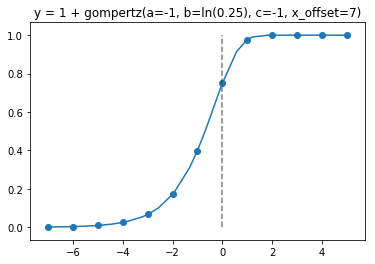

In [11]:
u_list = [0,1,2,3,4,5,6,7,8,9,10,11,12]
q = 7
c = 1

import math

ys = []
xs = []
xscat = []
yscat = []
the_range = numpy.linspace(u_list[0], u_list[-1], 20)
print(the_range)
for u in numpy.unique(u_list + list(the_range)):
    print(u)
#     gomp = 1 - numpy.exp(-numpy.log(0.75)*numpy.exp(-c*(q - u)))
    #a*exp(b*exp(c*dif))
    gomp = 1-math.exp( math.log(0.25) * math.exp(-(q-u)))
    print(u-q, gomp)
    if u in u_list:
        xscat.append(u-q)
        yscat.append(gomp)
    xs.append(u-q)
    ys.append(gomp)
plt.plot(xs, ys)
plt.scatter(x=xscat, y=yscat)
plt.title("y = 1 + gompertz(a=-1, b=ln(0.25), c=-1, x_offset=7)")
plt.vlines(0, ymin=0, ymax=1, linestyles="--", alpha=0.5)
plt.show()

In [12]:
# sixs = [str(n) for n in [0,0,0,0,0,1,1,1,1,1,2,2,2,2,2,2,3,3,3,3,3,3]]
# qixs = [str(n) for n in [0,1,2,3,4,0,1,2,3,4,0,1,2,3,4,3,0,1,2,3,1,2]]
# hout =                  [0,0,1,1,0,1,0,1,1,0,1,0,1,1,0,0,0,1,1,0,1,0]
# pfa = False
# things = split_next_step2(sixs,qixs,hout, split_for_PFA=pfa)
# (o_sixs, o_qixs, o_chits, o_out), (v_sixs, v_qixs, v_chits, v_out), (t_sixs, t_qixs, t_chits, t_out), sid_six_lookup, qid_qix_lookup = things

# for os,oq,och,ot in zip(o_sixs, o_qixs, o_chits, o_out):
#     print(os, oq, ":", ot)
#     if pfa:
#         print(och[0])
#         print(och[1])
#     else:
#         print(och)
#     print("____")

# for os,oq,och,ot in zip(v_sixs, v_qixs, v_chits, v_out):
#     print(os, oq, ":", ot)
#     if pfa:
#         print(och[0])
#         print(och[1])
#     else:
#         print(och)
#     print("____v")

# for os,oq,och,ot in zip(t_sixs, t_qixs, t_chits, t_out):
#     print(os, oq, ":", ot)
#     if pfa:
#         print(och[0])
#         print(och[1])
#     else:
#         print(och)
#     print("____t")

# ix=0
# for ts,tq in zip(t_sixs, t_qixs):
#     for os,oq in zip(o_sixs, o_qixs):
#         if (ts,tq) == (os,oq):
#             print(ix, "found T dupe,", ts,tq)
#     ix+=1
    
# vx=0
# for vs,vq in zip(v_sixs, v_qixs):
#     print(vs,vq)
#     ox=0
#     for os,oq in zip(o_sixs, o_qixs):
#         if (vs,vq) == (os,oq):
#             print(vx,ox, "found v dupe,", vs,vq)
#         ox+=1
#     vx+=1

In [13]:
a = [0, 2, 0, 0, 2]
a = numpy.array(a)
print(numpy.where(a==2))

(array([1, 4]),)


In [14]:
emb_w = 2
import gc, zlib

from collections import Counter
from keras.models import load_model
from keras.callbacks import EarlyStopping, LambdaCallback
data_to_run = [5,]
c= Counter()
for a in data_to_run:
    (tw,a0,a1, students_temp, qz_temp) = pickle.load(open(home+"/synth_data/MLTM_10000_1000_(100_1_5)_{}.p".format(a), "rb"))
    print("loaded dataset",a,":", a0,a1,tw)             
    
    n_students = 1000 # len(students2)
    n_questions = 1000 #len(questions)
    spars = 0.1

    # from keras.models import load_model
    fname = "MLTM_1000_1000_(100_1_5)_sp100_5_0"
    #   m = load_model(home+"/models/" + fname, custom_objects={'WeightClip': WeightClip})
    
    print(students_temp)
    print(qz_temp)
    
    
#     c[a] += 1

#     n_students = 500 # len(students2)
#     n_questions = 500 #len(questions)
#     students2 = students_temp[0:n_students]
#     questions = qz_temp[0:n_questions]

#     curr_min = numpy.min(students2)
#     start = curr_min - .1

#     #   pre_trained_qns = m.get_weights()[1]
#     #   print(pre_trained_qns.shape)
#     m = None

#     print(0.01**(1/3))
#     # p = 1/(1+e-z)
#     print(pr_to_spread(0.215, as_A_and_D=False))#  -1.295
#     # print(a0)

#     longitude = 12 # number of steps we assume students have been in play
#     # for s in students2:
#     #   print((s-start)/longitude)

#     students_start = numpy.zeros_like(students2) + start
#     # gammas = (students2 - start)/longitude
#     gammas = numpy.random.uniform(low=0.01, high=2.4, size=(n_students, emb_w))
#     print("Gammas:", numpy.min(gammas), numpy.max(gammas), numpy.mean(gammas), numpy.median(gammas))

#     fname = "Longitudinal_{}_{}_(100_1_5)_run={}".format(n_students, n_questions, a)
#     # try:

#     # try:
#     #   o_hits
#     # except NameError:
# #     if not o_hits:
# #     (sixs, qixs, hits, hout) = pickle.load(open(home+"/synth_data/" + fname + ".p", "rb"))
# #     (sixs, qixs, hout) = pickle.load(open(home+"/real_data/XL1041.p", "rb"))
#     # render_student_histories(sixs, qixs, hits, hout)
#     questions = None
#     students2 = None
#     students_temp = None
#     qz_temp = None

#     # pre_trained_qns = None
#     gc.collect()
#     o_hits=[]
#     t_hits=[]

#     odata, vdata, tdata, sid_six_lookup, qid_qix_lookup = split_next_step(sixs, qixs, hout, 
#                                                                           max_students = 100000,
#                                                                           min_hist = 40,
#                                                                           max_hist = None)#, alternate=True, balance_training=False)
#     (o_sixs, o_qixs, o_hits, o_out), (v_sixs, v_qixs, v_hits, v_out), (t_sixs, t_qixs, t_hits, t_out) = (odata, vdata, tdata)
#     print("len o_sixes", len(o_sixs))

#     n_questions = len(set(qixs))
#     n_students = len(set(sixs))

#     # raise Exception("DELIBERATE EXCEPTION CALLED")

# #     def uncomp(chits):
# #         for hix, chrow in enumerate(chits):
# #             chits[hix] = pickle.loads(zlib.decompress(chrow))
# #         chits = numpy.array(chits, dtype="uint8")
# #         return chits

# #     print("uncomping")
# #     o_hits = uncomp(o_chits)
# #     v_hits = uncomp(v_chits)
# #     t_hits = uncomp(t_chits)
# #     print("straight outta comp-ton")

#   # o_chits, v_chits, t_chits = None, None, None

#   # except:
#   # # if True:
#   #   av_sc, sixs, qixs, hits, hout = run_data(students_start, questions, gammas, model_to_train=None)
#   #   #   if s > 100:
#   #   #     break
#   #     # print(h)
#   #     # print(r)
#   #     # print("***")

#   #   gc.collect()
#   #   sixs = numpy.array(sixs, dtype="uint16")
#   #   qixs = numpy.array(qixs, dtype="uint16")
#   #   hits = numpy.array(hits, dtype="uint8")
#   #   for hix, hrow in enumerate(hits):
#   #     compd = zlib.compress(pickle.dumps(hrow))
#   #     chits[hix] = compd
#   #   hout = numpy.array(hout, dtype="uint8")
#   #   pickle.dump((sixs, qixs, chits, hout), open(home+"/synth_data/" + fname + ".p", "wb"))
#   #   chits = None

#   # for h in hits[0:10]:
#   #     print(h)

#   # raise Exception("GAR")

#   # for s,q,h,r in zip(sixs, qixs, hits, hout):
#   #   print(s,q, r)
#   # print(hout)
#   # print(int(sum(hout)))
#   # print(len(hout))
#   # raise Exception("DELIBERATE EXCEPTION CALLED")

#   # qlayer = m.get_layer("qn_embedding")
#   # print(qlayer.shape)
#   # m.get_layer("qn_embedding").set_weights(pre_trained_qns)
#   # m.get_layer("qn_embedding").trainable=False


#   # hin2 = hin #numpy.array(hin).reshape(-1,(1,1,n_questions))
#   # hout2 = numpy.array(hout).reshape(-1,1)

#     n_to_keep = 10000

#   # qixs = qixs[0:n_to_keep]
#   # sixs = sixs[0:n_to_keep]  
#   # hits = hits[0:n_to_keep]
#   # hout = hout[0:n_to_keep]

#   # n_questions = len(numpy.unique(o_qixs))
#   # n_students  = len(numpy.unique(o_sixs))



#   # n_questions = max(max(o_qixs),max(v_qixs),max(t_qixs))+1
#   # n_students = max(max(o_sixs),max(v_sixs),max(t_sixs))+1



#   # m = generate_longitudinal_model(n_questions, n_students, emb_w, None) #pre_trained_qns[0:n_questions])

#     n_to_test = 1000 #len(hout)//10
#     test_choices = numpy.random.choice(range(len(hout)), size=n_to_test)
#   # t_in = hin2[test_choices, :]

#   # t_hits = hits[test_choices]
#   # o_hits = numpy.delete(hits, test_choices, axis=0)

#   # qs_in_trimmed_data =  numpy.unique(qixs)
#   # t_hits = numpy.array([hits[ix] for ix in test_choices])
#   # o_hits = numpy.delete(hits, test_choices, axis=0)
#   # hits=None
#   # t_hits = t_hits[:, qs_in_trimmed_data]
#   # t_hits = t_hits.reshape(-1, len(qs_in_trimmed_data))
#   # o_hits = o_hits[:, qs_in_trimmed_data]
#   # o_hits = o_hits.reshape(-1, len(qs_in_trimmed_data))

#     gc.collect()

#   # t_out = hout[test_choices, :]
#   # t_out = numpy.array([hout[ix] for ix in test_choices]).reshape(-1,1)
#   # o_out = numpy.delete(hout, test_choices, axis=0).reshape(-1,1)
#   # hout=None


#   # t_sixs = numpy.array([sixs[ix] for ix in test_choices]).reshape(-1,1)
#   # # t_sixs = sixs[test_choices, :]
#   # o_sixs = numpy.delete(sixs, test_choices, axis=0).reshape(-1,1)
#   # sixs=None

#   # t_qixs = numpy.array([qixs[ix] for ix in test_choices]).reshape(-1,1)
#   # # t_qixs = qixs[test_choices, :]
#   # o_qixs = numpy.delete(qixs, test_choices, axis=0).reshape(-1,1)

#     print("MM", numpy.min(o_qixs), numpy.max(o_qixs))
#     qixs=None
  
#   # o_in  = numpy.delete(hin2, test_choices, axis=0)
  
#   # hazard_model = Model(inputs=m.input,
#   #                         outputs=m.get_layer("alphas").output)
# #         intermediate_output = intermediate_layer_model.predict([qz,sz])
       
    
    
# #         print_prs = LambdaCallback(on_epoch_end=lambda batch, logs: 
# # #                                        print(numpy.min(intermediate_layer_model.predict([qz,sz])),
# # #                                              numpy.max(intermediate_layer_model.predict([qz,sz]))))
# #                                        print(prs_model.predict([qz[0:10],sz[0:10]])))

#   # ixs = o_out > 0.5
#     ixs = [True if o_out[n]>=0.5 else False for n in range(len(o_out))]
#   # print(ixs)
#   # print(o_out[ixs])
#   # print(o_qixs[ixs])
#   # print(o_sixs[ixs])
#   # print(o_hits[ixs])
#     print_hazard = LambdaCallback(on_epoch_end=lambda batch, logs:
#                                   # print(hazard_model.predict([o_qixs[ixs], o_sixs[ixs], o_hits[ixs]])))
#                                   print(m.predict([o_qixs[ixs], o_sixs[ixs], o_hits[ixs]]), o_out[ixs]))

#         # print_zmask = LambdaCallback(on_epoch_end=lambda batch, logs: 
#         #                                print(z_model.predict([qz[0:10],sz[0:10]])))

#   # n_ones  = int(numpy.sum(o_out, axis=0))
#   # n_zeros = len(o_out) - n_ones

#   # n_ones =  sum([1 if o_out[n]>=0.5 else 0 for n in range(len(o_out))])
#   # n_zeros = sum([1 if o_out[n]<0.5 else 0 for n in range(len(o_out))])

# #   geschichte = m.fit([o_qixs, o_sixs, o_hits], o_out, epochs=10000, validation_split=0.01, callbacks=[es], shuffle=True, class_weight=class_weightz)

# print(type(o_sixs))
# print("finished")

loaded dataset 5 : [[1.4645131]] 3.1089039466440367 1.4084517039946103
[[ 1.37173388 -1.02864352  7.55703414 ... -1.49886535  1.53442336
   1.55596703]
 [ 2.4635658   0.53089028 -5.45221188 ... -0.74608016  2.82944632
   1.92081998]
 [ 1.55326451 -3.58004045 -1.89803685 ... -0.54779934  1.07594026
  -1.57406956]
 ...
 [ 2.1023064   2.8166152  -0.4222581  ...  2.81755714 -6.81089099
  -5.47685088]
 [-3.94892705 -1.47331223  1.72161864 ...  5.54785844  0.01453553
  -1.07487148]
 [-2.68058906  0.55106707  0.27516104 ... -0.01492254  0.32854899
  -0.09848295]]
[[-10.         -10.         -10.         ... -10.         -10.
  -10.        ]
 [-10.         -10.          -2.23522303 ... -10.         -10.
  -10.        ]
 [-10.         -10.         -10.         ... -10.         -10.
  -10.        ]
 ...
 [-10.         -10.         -10.         ... -10.         -10.
  -10.        ]
 [-10.         -10.         -10.         ... -10.         -10.
  -10.        ]
 [-10.         -10.         -10.     

In [15]:
# from keras.utils.layer_utils import count_params
# from sklearn.metrics import log_loss
# def AIC(y, y_hat, n_params, n_obs=1):
# #     y_hat = model.predict(X)
# #     resid = y - y_hat
# #     sse = numpy.sum(numpy.power(resid,2)) / n_obs
# # y_true = np.array([0, 1, 1])
# # y_pred = np.array([0.1, 0.2, 0.9])

# #     print(y)
# #     print(y_hat)

#     ll = -log_loss(y, y_hat)
#     # 0.60671964791658428
# #     print("LL", ll)
#     k   = n_params
#     aic = 2*k - 2* math.log(ll)
#     return aic

# def run_acc_mae_test(m, o_data, t_data, config_dict, print_clfn_report=False):
#     from sklearn.metrics import accuracy_score, mean_absolute_error, f1_score
#     print(config_dict["cog_model"], "£MB_W", config_dict["emb_w"])
#     t_sixs, t_qixs, t_hits, _ = t_data
#     o_sixs, o_qixs, o_hits, _ = o_data
#     p_hats = numpy.round( m.predict( [t_qixs, t_sixs, t_hits] ) )
#     p_trues = t_out
#     t_f1 = f1_score(p_trues, p_hats, average="macro")
#     f1_micro = f1_score(p_trues, p_hats, average="micro")
#     t_acc = accuracy_score(p_trues, p_hats)
#     t_mae = mean_absolute_error(p_trues, p_hats)
#     n_params = count_params(m.trainable_weights)
#     aic = 0 #AIC(p_trues, p_hats, n_params)
#     print("macro", t_f1  )
#     print("micro", f1_micro)
#     print( t_acc )
#     print( t_mae )
#     if print_clfn_report:
#         from sklearn.metrics import classification_report
#         print(classification_report(p_trues, p_hats))
#     return t_f1, t_acc, t_mae, aic

In [16]:
# import scipy
# from scipy.stats import spearmanr

# # def distance(a,b_list, cosine=False):
# # #     return numpy.sqrt(numpy.sum(numpy.power(a-b,2)))
# #     a = numpy.array(a).reshape(1,-1)
# #     if not cosine:
# #         #return scipy.spatial.distance.euclidean(a,b)
# #         return scipy.spatial.distance.cdist(a,b_list, metric="euclidean")
# #     else:
# #         dasErgebnis = scipy.spatial.distance.cdist(a,b_list, metric="cosine")
# # #         for x in reswlt.flatten():
# # #             if math.isnan(x):
# # #                 print("Nan is cosine distance result")
# # #                 print(a)
# # #                 print(list(b_list))
# # #                 raise Exception("NAN in cos distance")
# #         if numpy.isnan(numpy.sum(dasErgebnis)):
# #             dasErgebnis = numpy.nan_to_num(dasErgebnis, copy=False, nan=1.0, posinf=None, neginf=None)
# #         return dasErgebnis

    
# def distance(a, b_list):
#     a = numpy.array(a).reshape(1,-1)
#     b_list = numpy.array(b_list).reshape(-1,a.shape[1]) # len(b_list) x width(a)
#     return scipy.spatial.distance.cdist(a,b_list, metric="euclidean")
    

# # flax1 = [
# #     [1,2,3],
# #     [1,2,3],
# #     [1,3,10]
# # ]

# # flax2 = [
# #     [1,2,5],
# #     [1,5,3],
# #     [5,3,10],
# #     [6, 7, 8]
# # ]

# # flax1 = numpy.array(flax1)
# # flax2 = numpy.array(flax2)

# # zero_pt = min(numpy.min(flax1), numpy.min(flax2))
# # flax1 -= zero_pt
# # flax2 -= zero_pt

# # print(flax1)
# # print(flax2)

# # for row in flax1:
# #     print(distance(row, flax2))

In [17]:
   
# def build_adjacency_matrix(points_list, cosine=False):
#     dim = len(points_list) # num of points is the dim of the adj_mx
# #     print("dim is", dim)
#     flat_dmx = [] # numpy.zeros((dim,dim)) # empty mx
    
#     for a_ix in range(dim-1):
#         a = points_list[a_ix]
# #         print(a_ix, "a\n",a)
#         to_comp = points_list[a_ix+1:]
# #         print("# to comp")
# #         print(len(to_comp))
# #         print(to_comp)
#         ds = distance(a, to_comp).ravel()
# #         print("# little ds", len(ds))
# #         print(ds)
#         flat_dmx.extend(list(ds))
# #     flat_dmx = list(numpy.array(flat_dmx).ravel())
    
    
# #     for ax,a in enumerate(points_list):
# #         for bx,b in enumerate(points_list):
# #             if ax<bx: #only fill in the top right triangle of the matrix
# #                 flat_dmx.append(distance(a,b, cosine=cosine))
# # #                 adj_mx[ax,bx] = distance(a,b)
#     print("flat dmx length is ", len(flat_dmx))
#     return flat_dmx


# def find_pairwise_rbo_in_adj_mx_list(adj_mx_list):
#     ranking_list = []
#     for amx in adj_mx_list:
# #         rankings = list(numpy.argsort(amx))
#         rankings = amx
#         ranking_list.append(rankings)
    
#     rbos = []
#     seen = set()
#     for ix,r1 in enumerate(ranking_list):
#         for jx,r2 in enumerate(ranking_list):
#             if ix!=jx:
#                 if ((ix,jx) not in seen) and ((jx,ix) not in seen):
# #                     print("r1", r1)
# #                     print("r2", r2)
#                     this_rbo = spearmanr(r1, r2)[0]
# #                     this_rbo = rbo_score(r1, r2, p=0.98)
#                     rbos.append(this_rbo)
#                     seen.add((ix,jx))
#                     seen.add((jx,ix))

#     print("correlations", rbos)
#     mean_rbo = numpy.mean(rbos)
# #     median_rbo = numpy.median(rbos)
#     sd_rbo = numpy.std(rbos)
#     return mean_rbo, sd_rbo

In [18]:
# from sklearn.preprocessing import MinMaxScaler
# def compare_adj_matrices(adj_mcs, handle=None):
    
#     vr, sd = find_pairwise_rbo_in_adj_mx_list(adj_mcs)
    
#     max_val=0
#     for m in adj_mcs:
#         this_max = numpy.amax(m)
#         if this_max>max_val:
#             max_val = this_max
#     if max_val == 0:
#         raise Exception("Distance matrix is all zeros")
            
#     flattened_mxs = adj_mcs
# #     mean_dist = numpy.mean(adj_mcs)
    
#     if handle:
#         print("For", handle)
#     print("number of flattened adj mxs = ", len(flattened_mxs))
#     print("number of elements per flattened mx = ", len(flattened_mxs[0]))
#     print("distances min/max/mu/med:", numpy.min(adj_mcs), numpy.max(adj_mcs), numpy.mean(adj_mcs), numpy.median(adj_mcs))

#     print("Average var       =", vr, "({})".format(sd))
# #     print("Norm Av var       =", n_vr)
# #             print("Norm/d corr/n Med =", correltn_md)
# #             print("Norm/d corr/n Mean=", correltn_mn)
#     return vr, sd, 0, 0 #TODO deprecate these zeroes

In [19]:
def process_history_results(history_results, o_data, t_data):
    import copy 
    rankin = []
    max_acc = -math.inf
    
    for item in history_results:
#     config_dict, m, h = item
        config_dict, m, h = item
        config_dict = copy.copy(config_dict)
        cog_model = config_dict["cog_model"]
        emb_w = config_dict["emb_w"]
        try:
            q_weight = config_dict["q_weight"]
            config_dict["cog_model"] = config_dict["cog_model"] + " " + str(emb_w) + " " + str(q_weight)
        except:
            pass
#             raise Exception("No such key: q_weight")

        v_loss = h.history["val_loss"]
        v_acc  = h.history["val_accuracy"]
        v_mse   = h.history["val_mean_absolute_error"]
        o_loss   = h.history["loss"]
        o_acc    = h.history["accuracy"]
        o_mse    = h.history["mean_absolute_error"]
        plot_acc = v_acc#[0:-10]
        plot_loss = v_loss#[0:-10]
        plot_mse = v_mse#[0:-10]

        t_acc, t_mae = run_acc_mae_test(m, o_data, t_data, config_dict)

        mod_name = cog_model +" "+ str(emb_w)
        try:
            mod_name = mod_name + " "+ str(q_weight)
        except:
            pass
        
        tup = (t_mae, t_acc, min(v_mse), max(v_acc), mod_name)
        rankin.append( tup ) 
        if max_acc < max(v_acc):
            max_acc = max(v_acc)
            max_mod = cog_model +" "+ str(emb_w)
            min_mse = min(v_mse)
            min_loss = min(v_loss)
            best_m = m
        
    print("**", max_mod, max_acc, min_loss, min_mse)
    m = best_m
    
    rankin = sorted(rankin)
    for r in rankin:
               print(r[-1],"&", numpy.round(r[1],2),"&", numpy.round(r[0],2),"\\\\")
#         print(r[-1],"&", numpy.round(r[1],2),"({})".format(numpy.round(r[3],2)),"&", numpy.round(r[0],2), "({})".format(numpy.round(r[2],2)),"\\\\")

In [20]:
from keras.metrics import binary_accuracy, binary_crossentropy, mean_absolute_error, mean_squared_error
from sklearn.metrics import f1_score
import os
mon_lookup = {
    "binary_crossentropy" : "xe",
    "mean_squared_error"  : "mse",
    "mean_absolute_error" : "mae",
    "f1_loss" : "f1",
    "binary_accuracy" : "acc",
    "log_likelihood" : "ll",
    "loss" : "px"
}

max_s = 1000000
dataset_handle = "examliftb1"
overwrite_disc = True

# kustom_objex = {'WeightClip': WeightClip, 'custom_avl2': custom_avl2, 'custom_avl2_inner':custom_avl2_inner}

if dataset_handle == "cmu_geom_steplevel":
    (sixs, qixs, hout) = pickle.load(open(home+"/real_data/cmu_geom_steplevel.p", "rb"))
    min_hist = 10
elif dataset_handle == "examliftb1":
    (sixs, qixs, hout) = pickle.load(open(home+"/real_data/XL1041.p", "rb"))
    min_hist = 100
    if min_hist<2:
        raise Exception("partitioning won't work unless you have at least two interactions for train/[v|t]")
elif dataset_handle == "isaac":
    (sixs, qixs, hout) = pickle.load(open(home+"/real_data/isaac_hwgen.p", "rb"))
    min_hist = 100
    if min_hist<2:
        raise Exception("partitioning won't work unless you have at least two interactions for train/[v|t]")
elif dataset_handle == "kdd_cup":
    raise Exception("Not yet supported " + str(dataset_handle))
else:
    raise Exception("Invalid dataset handle " + str(dataset_handle))

strat=True
split_for_PFA = False
use_legacy = False
if use_legacy:
    data_bundle = legacy_split_next_step(sixs, qixs, hout, 
                                  max_students = max_s,
                                  min_hist = min_hist,
                                  max_hist = None,
                                )
else:
    data_bundle = split_next_step2(sixs, qixs, hout, 
                                  max_students = max_s,
                                  min_hist = min_hist,
                                  max_hist = None,
                                  split_for_PFA=split_for_PFA,
                                  stratify=strat
                                  )

if overwrite_disc:
    if use_legacy:
        dataset_name = dataset_handle + str(max_s)
    else:
        dataset_name = dataset_handle + ("_PFA" if split_for_PFA else "_LFA") + ("_strat_" if strat else "_") + str(max_s)

    dataset_name += "_m" + str(min_hist)
        
    fnm = home+"/real_data/" + dataset_name

    odata, vdata, tdata, sid_six_lookup, qid_qix_lookup = data_bundle
    (o_sixs, o_qixs, o_hits, o_out), (v_sixs, v_qixs, v_hits, v_out), (t_sixs, t_qixs, t_hits, t_out) = (odata, vdata, tdata)
    
    with open(fnm, 'wb') as f:
        pickle.dump(data_bundle, f, protocol=4)
    print(fnm)
else:
    print("not overwriting disc")
        
print("DATAGEN ONLY DONE")

splitting in progress
11188
iterating...
len of these_qids: 339
0 : Error finding 1~1.0
1 : Error finding 1~2.0
2 : Error finding 1~3.0
3 : Error finding 1~4.0
4 : Error finding 1~6.0
5 : Error finding 1~7.0
6 : Speed reading 14~2.0
7 : Speed reading 14~3.0
8 : Speed reading 14~4.0
9 : Speed reading 14~5.0
10 : Minimal pairs 1~1.0
11 : Minimal pairs 1~2.0
12 : Minimal pairs 1~3.0
13 : Minimal pairs 1~4.0
14 : Minimal pairs 1~5.0
15 : Minimal pairs 1~6.0
16 : Minimal pairs 1~7.0
17 : Minimal pairs 1~8.0
18 : Minimal pairs 1~9.0
19 : Minimal pairs 1~10.0
20 : Minimal pairs 1~11.0
21 : Minimal pairs 1~12.0
22 : Minimal pairs 1~13.0
23 : Minimal pairs 1~14.0
24 : Minimal pairs 1~15.0
25 : Dialogue 1~1.0
26 : Dialogue 1~2.0
27 : Dialogue 1~3.0
28 : Dialogue 1~4.0
29 : Dialogue 1~5.0
30 : Error finding 1~5.0
31 : Speed reading 14~1.0
32 : Speed reading 13~1.0
33 : Speed reading 13~2.0
34 : Speed reading 13~3.0
35 : Speed reading 13~4.0
36 : Speed reading 13~5.0
37 : Topic associations 1~2.0


332 : Dialogue 3~3.0
333 : Dialogue 3~4.0
334 : Dialogue 3~5.0
335 : Phrasal verbs 3~1.0
336 : Phrasal verbs 3~2.0
337 : Phrasal verbs 3~3.0
338 : Phrasal verbs 3~4.0
339 : Phrasal verbs 3~5.0
340 : Phrasal verbs 3~6.0
341 : Phrasal verbs 3~7.0
342 : Phrasal verbs 3~8.0
343 : Phrasal verbs 3~9.0
344 : Phrasal verbs 3~10.0
345 : Phrasal verbs 3~11.0
346 : Phrasal verbs 3~12.0
347 : Phrasal verbs 3~13.0
348 : Phrasal verbs 3~14.0
349 : Topic match 10~1.0
350 : Topic match 10~2.0
351 : Topic match 10~3.0
352 : Topic match 10~4.0
353 : Topic match 10~5.0
354 : Topic match 10~6.0
355 : Topic match 10~7.0
356 : Error finding 6~1.0
357 : Error finding 6~2.0
358 : Error finding 6~3.0
359 : Error finding 6~4.0
360 : Error finding 6~5.0
361 : Error finding 6~6.0
362 : Error finding 6~7.0
cnt! 701
len of these_qids: 138
cnt! 838
len of these_qids: 105
cnt! 942
len of these_qids: 126
363 : Spelling 6~2.0
cnt! 1067
len of these_qids: 207
cnt! 1273
len of these_qids: 981
364 : Error finding 2~1.0
36

len of these_qids: 122
cnt! 3090
len of these_qids: 230
cnt! 3319
len of these_qids: 130
1015 : Speed reading 3~1.0
1016 : Speed reading 3~2.0
1017 : Speed reading 3~3.0
1018 : Speed reading 3~4.0
1019 : Speed reading 3~5.0
1020 : Spelling 7~1.0
1021 : Spelling 7~2.0
1022 : Spelling 7~3.0
1023 : Spelling 7~6.0
1024 : Spelling 7~7.0
1025 : Spelling 7~8.0
1026 : Spelling 7~9.0
1027 : Spelling 7~10.0
1028 : Spelling 7~11.0
1029 : Spelling 7~12.0
1030 : Spelling 7~13.0
1031 : Spelling 7~14.0
1032 : Spelling 7~15.0
1033 : Spelling 7~16.0
1034 : Spelling 7~17.0
1035 : Spelling 7~18.0
1036 : Topic match 7~1.0
1037 : Topic match 7~2.0
1038 : Topic match 7~3.0
1039 : Topic match 7~4.0
1040 : Topic match 7~5.0
1041 : Topic match 7~6.0
1042 : Topic match 7~7.0
cnt! 3448
len of these_qids: 178
cnt! 3625
len of these_qids: 142
cnt! 3766
len of these_qids: 168
cnt! 3933
len of these_qids: 121
cnt! 4053
len of these_qids: 218
cnt! 4270
len of these_qids: 230
cnt! 4499
len of these_qids: 177
cnt! 4675

len of these_qids: 225
cnt! 43238
len of these_qids: 163
cnt! 43400
len of these_qids: 296
cnt! 43695
len of these_qids: 102
cnt! 43796
len of these_qids: 106
cnt! 43901
len of these_qids: 190
cnt! 44090
len of these_qids: 163
cnt! 44252
len of these_qids: 151
cnt! 44402
len of these_qids: 115
cnt! 44516
len of these_qids: 135
cnt! 44650
len of these_qids: 1006
cnt! 45655
len of these_qids: 384
cnt! 46038
len of these_qids: 194
cnt! 46231
len of these_qids: 145
cnt! 46375
len of these_qids: 154
cnt! 46528
len of these_qids: 628
cnt! 47155
len of these_qids: 173
cnt! 47327
len of these_qids: 167
cnt! 47493
len of these_qids: 213
cnt! 47705
len of these_qids: 112
cnt! 47816
len of these_qids: 375
cnt! 48190
len of these_qids: 154
cnt! 48343
len of these_qids: 216
cnt! 48558
len of these_qids: 160
cnt! 48717
len of these_qids: 409
cnt! 49125
len of these_qids: 1170
cnt! 50294
len of these_qids: 121
cnt! 50414
len of these_qids: 163
cnt! 50576
len of these_qids: 418
cnt! 50993
len of these

len of these_qids: 166
cnt! 104385
len of these_qids: 281
cnt! 104665
len of these_qids: 228
cnt! 104892
len of these_qids: 105
cnt! 104996
len of these_qids: 364
cnt! 105359
len of these_qids: 300
cnt! 105658
len of these_qids: 112
cnt! 105769
len of these_qids: 1524
cnt! 107292
len of these_qids: 163
cnt! 107454
len of these_qids: 127
cnt! 107580
len of these_qids: 138
cnt! 107717
len of these_qids: 580
cnt! 108296
len of these_qids: 103
cnt! 108398
len of these_qids: 133
cnt! 108530
len of these_qids: 112
cnt! 108641
len of these_qids: 237
cnt! 108877
len of these_qids: 116
cnt! 108992
len of these_qids: 123
cnt! 109114
len of these_qids: 108
cnt! 109221
len of these_qids: 224
cnt! 109444
len of these_qids: 121
cnt! 109564
len of these_qids: 111
cnt! 109674
len of these_qids: 448
cnt! 110121
len of these_qids: 102
cnt! 110222
len of these_qids: 140
cnt! 110361
len of these_qids: 120
cnt! 110480
len of these_qids: 129
cnt! 110608
len of these_qids: 135
cnt! 110742
len of these_qids: 

len of these_qids: 145
cnt! 168518
len of these_qids: 101
cnt! 168618
len of these_qids: 116
cnt! 168733
len of these_qids: 107
cnt! 168839
len of these_qids: 369
cnt! 169207
len of these_qids: 408
cnt! 169614
len of these_qids: 117
cnt! 169730
len of these_qids: 540
cnt! 170269
len of these_qids: 565
cnt! 170833
len of these_qids: 214
cnt! 171046
len of these_qids: 260
cnt! 171305
len of these_qids: 103
cnt! 171407
len of these_qids: 517
cnt! 171923
len of these_qids: 496
cnt! 172418
len of these_qids: 148
cnt! 172565
len of these_qids: 206
cnt! 172770
len of these_qids: 185
cnt! 172954
len of these_qids: 175
cnt! 173128
len of these_qids: 109
cnt! 173236
len of these_qids: 226
cnt! 173461
len of these_qids: 167
cnt! 173627
len of these_qids: 493
cnt! 174119
len of these_qids: 125
cnt! 174243
len of these_qids: 106
cnt! 174348
len of these_qids: 262
cnt! 174609
len of these_qids: 170
cnt! 174778
len of these_qids: 186
cnt! 174963
len of these_qids: 147
cnt! 175109
len of these_qids: 1

len of these_qids: 148
cnt! 229796
len of these_qids: 144
cnt! 229939
len of these_qids: 163
cnt! 230101
len of these_qids: 172
cnt! 230272
len of these_qids: 120
cnt! 230391
len of these_qids: 431
cnt! 230821
len of these_qids: 264
cnt! 231084
len of these_qids: 132
cnt! 231215
len of these_qids: 134
cnt! 231348
len of these_qids: 570
cnt! 231917
len of these_qids: 346
cnt! 232262
len of these_qids: 130
cnt! 232391
len of these_qids: 144
cnt! 232534
len of these_qids: 144
cnt! 232677
len of these_qids: 217
cnt! 232893
len of these_qids: 133
cnt! 233025
len of these_qids: 157
cnt! 233181
len of these_qids: 103
cnt! 233283
len of these_qids: 148
cnt! 233430
len of these_qids: 168
cnt! 233597
len of these_qids: 377
cnt! 233973
len of these_qids: 177
cnt! 234149
len of these_qids: 116
cnt! 234264
len of these_qids: 140
cnt! 234403
len of these_qids: 167
cnt! 234569
len of these_qids: 137
cnt! 234705
len of these_qids: 101
cnt! 234805
len of these_qids: 472
cnt! 235276
len of these_qids: 1

len of these_qids: 104
cnt! 294065
len of these_qids: 161
cnt! 294225
len of these_qids: 949
cnt! 295173
len of these_qids: 205
cnt! 295377
len of these_qids: 214
cnt! 295590
len of these_qids: 318
cnt! 295907
len of these_qids: 513
cnt! 296419
len of these_qids: 225
cnt! 296643
len of these_qids: 145
cnt! 296787
len of these_qids: 449
cnt! 297235
len of these_qids: 556
cnt! 297790
len of these_qids: 308
cnt! 298097
len of these_qids: 324
cnt! 298420
len of these_qids: 177
cnt! 298596
len of these_qids: 128
cnt! 298723
len of these_qids: 670
cnt! 299392
len of these_qids: 135
cnt! 299526
len of these_qids: 157
cnt! 299682
len of these_qids: 140
cnt! 299821
len of these_qids: 345
cnt! 300165
len of these_qids: 178
cnt! 300342
len of these_qids: 112
cnt! 300453
len of these_qids: 126
cnt! 300578
len of these_qids: 274
cnt! 300851
len of these_qids: 113
cnt! 300963
len of these_qids: 120
cnt! 301082
len of these_qids: 302
cnt! 301383
len of these_qids: 284
cnt! 301666
len of these_qids: 1

len of these_qids: 134
cnt! 356539
len of these_qids: 146
cnt! 356684
len of these_qids: 687
cnt! 357370
len of these_qids: 130
cnt! 357499
len of these_qids: 185
cnt! 357683
len of these_qids: 218
cnt! 357900
len of these_qids: 209
cnt! 358108
len of these_qids: 111
cnt! 358218
len of these_qids: 105
cnt! 358322
len of these_qids: 417
cnt! 358738
len of these_qids: 153
cnt! 358890
len of these_qids: 185
cnt! 359074
len of these_qids: 119
cnt! 359192
len of these_qids: 327
cnt! 359518
len of these_qids: 165
cnt! 359682
len of these_qids: 115
cnt! 359796
len of these_qids: 105
cnt! 359900
len of these_qids: 147
cnt! 360046
len of these_qids: 108
cnt! 360153
len of these_qids: 203
cnt! 360355
len of these_qids: 182
cnt! 360536
len of these_qids: 214
cnt! 360749
len of these_qids: 372
cnt! 361120
len of these_qids: 259
cnt! 361378
len of these_qids: 334
cnt! 361711
len of these_qids: 266
cnt! 361976
len of these_qids: 106
cnt! 362081
len of these_qids: 576
cnt! 362656
len of these_qids: 1

len of these_qids: 217
cnt! 418436
len of these_qids: 150
cnt! 418585
len of these_qids: 118
cnt! 418702
len of these_qids: 423
cnt! 419124
len of these_qids: 164
cnt! 419287
len of these_qids: 688
cnt! 419974
len of these_qids: 265
cnt! 420238
len of these_qids: 416
cnt! 420653
len of these_qids: 102
cnt! 420754
len of these_qids: 250
cnt! 421003
len of these_qids: 272
cnt! 421274
len of these_qids: 297
cnt! 421570
len of these_qids: 444
cnt! 422013
len of these_qids: 278
cnt! 422290
len of these_qids: 891
cnt! 423180
len of these_qids: 154
cnt! 423333
len of these_qids: 137
cnt! 423469
len of these_qids: 136
cnt! 423604
len of these_qids: 174
cnt! 423777
len of these_qids: 159
cnt! 423935
len of these_qids: 115
cnt! 424049
len of these_qids: 260
cnt! 424308
len of these_qids: 176
cnt! 424483
len of these_qids: 162
cnt! 424644
len of these_qids: 131
cnt! 424774
len of these_qids: 159
cnt! 424932
len of these_qids: 184
cnt! 425115
len of these_qids: 342
cnt! 425456
len of these_qids: 1

len of these_qids: 162
cnt! 476825
len of these_qids: 211
cnt! 477035
len of these_qids: 542
cnt! 477576
len of these_qids: 282
cnt! 477857
len of these_qids: 174
cnt! 478030
len of these_qids: 106
cnt! 478135
len of these_qids: 300
cnt! 478434
len of these_qids: 103
cnt! 478536
len of these_qids: 126
cnt! 478661
len of these_qids: 828
cnt! 479488
len of these_qids: 153
cnt! 479640
len of these_qids: 120
cnt! 479759
len of these_qids: 192
cnt! 479950
len of these_qids: 341
cnt! 480290
len of these_qids: 178
cnt! 480467
len of these_qids: 155
cnt! 480621
len of these_qids: 251
cnt! 480871
len of these_qids: 119
cnt! 480989
len of these_qids: 170
cnt! 481158
len of these_qids: 192
cnt! 481349
len of these_qids: 103
cnt! 481451
len of these_qids: 108
cnt! 481558
len of these_qids: 254
cnt! 481811
len of these_qids: 329
cnt! 482139
len of these_qids: 195
cnt! 482333
len of these_qids: 101
cnt! 482433
len of these_qids: 281
cnt! 482713
len of these_qids: 106
cnt! 482818
len of these_qids: 1

len of these_qids: 271
cnt! 537964
len of these_qids: 323
cnt! 538286
len of these_qids: 379
cnt! 538664
len of these_qids: 105
cnt! 538768
len of these_qids: 124
cnt! 538891
len of these_qids: 130
cnt! 539020
len of these_qids: 656
cnt! 539675
len of these_qids: 159
cnt! 539833
len of these_qids: 118
cnt! 539950
len of these_qids: 436
cnt! 540385
len of these_qids: 537
cnt! 540921
len of these_qids: 127
cnt! 541047
len of these_qids: 241
cnt! 541287
len of these_qids: 204
cnt! 541490
len of these_qids: 161
cnt! 541650
len of these_qids: 213
cnt! 541862
len of these_qids: 121
cnt! 541982
len of these_qids: 180
cnt! 542161
len of these_qids: 149
cnt! 542309
len of these_qids: 390
cnt! 542698
len of these_qids: 169
cnt! 542866
len of these_qids: 141
cnt! 543006
len of these_qids: 181
cnt! 543186
len of these_qids: 168
cnt! 543353
len of these_qids: 102
cnt! 543454
len of these_qids: 170
cnt! 543623
len of these_qids: 221
cnt! 543843
len of these_qids: 121
cnt! 543963
len of these_qids: 2

len of these_qids: 386
cnt! 603273
len of these_qids: 125
cnt! 603397
len of these_qids: 138
cnt! 603534
len of these_qids: 101
cnt! 603634
len of these_qids: 286
cnt! 603919
len of these_qids: 184
cnt! 604102
len of these_qids: 136
cnt! 604237
len of these_qids: 107
cnt! 604343
len of these_qids: 398
cnt! 604740
len of these_qids: 588
cnt! 605327
len of these_qids: 203
cnt! 605529
len of these_qids: 318
cnt! 605846
len of these_qids: 145
cnt! 605990
len of these_qids: 166
cnt! 606155
len of these_qids: 129
cnt! 606283
len of these_qids: 426
cnt! 606708
len of these_qids: 216
cnt! 606923
len of these_qids: 161
cnt! 607083
len of these_qids: 147
cnt! 607229
len of these_qids: 199
cnt! 607427
len of these_qids: 172
cnt! 607598
len of these_qids: 153
cnt! 607750
len of these_qids: 201
cnt! 607950
len of these_qids: 130
cnt! 608079
len of these_qids: 226
cnt! 608304
len of these_qids: 249
cnt! 608552
len of these_qids: 250
cnt! 608801
len of these_qids: 326
cnt! 609126
len of these_qids: 1

listening~minimal_pairs : v= 14  t= 15
listening~minimal_pairs : v= 15  t= 15
speaking~topic_association : v= 11  t= 12
writing~error_correction : v= 10  t= 11
speaking~dialogue : v= 10  t= 11
writing~spelling : v= 9  t= 10
reading~speed_reading : v= 12  t= 13
listening~minimal_pairs : v= 15  t= 16
reading~phrasal_verbs : v= 18  t= 19
writing~error_correction : v= 11  t= 11
speaking~dialogue : v= 11  t= 11
writing~error_correction : v= 11  t= 12
speaking~topic_association : v= 12  t= 12
writing~spelling : v= 10  t= 10
speaking~topic_association : v= 12  t= 13
reading~phrasal_verbs : v= 19  t= 19
listening~minimal_pairs : v= 16  t= 16
writing~error_correction : v= 12  t= 12
speaking~topic_association : v= 13  t= 13
reading~phrasal_verbs : v= 19  t= 20
listening~minimal_pairs : v= 16  t= 17
writing~error_correction : v= 12  t= 13
speaking~dialogue : v= 11  t= 12
writing~error_correction : v= 13  t= 13
listening~topic_match : v= 12  t= 12
writing~spelling : v= 10  t= 11
speaking~dialogue 

speaking~topic_association : v= 34  t= 34
listening~minimal_pairs : v= 42  t= 43
listening~topic_match : v= 46  t= 46
speaking~dialogue : v= 40  t= 41
writing~spelling : v= 44  t= 44
listening~minimal_pairs : v= 43  t= 43
speaking~dialogue : v= 41  t= 41
reading~phrasal_verbs : v= 65  t= 65
reading~phrasal_verbs : v= 65  t= 66
reading~speed_reading : v= 35  t= 36
reading~phrasal_verbs : v= 66  t= 66
listening~topic_match : v= 46  t= 47
writing~error_correction : v= 31  t= 32
speaking~dialogue : v= 41  t= 42
speaking~dialogue : v= 42  t= 42
listening~topic_match : v= 47  t= 47
listening~topic_match : v= 47  t= 48
reading~phrasal_verbs : v= 66  t= 67
reading~phrasal_verbs : v= 67  t= 67
reading~phrasal_verbs : v= 67  t= 68
writing~error_correction : v= 32  t= 32
speaking~dialogue : v= 42  t= 43
listening~topic_match : v= 48  t= 48
speaking~topic_association : v= 34  t= 35
writing~spelling : v= 44  t= 45
listening~minimal_pairs : v= 43  t= 44
reading~phrasal_verbs : v= 68  t= 68
writing~s

listening~topic_match : v= 73  t= 74
reading~phrasal_verbs : v= 108  t= 109
reading~phrasal_verbs : v= 109  t= 109
listening~topic_match : v= 74  t= 74
writing~error_correction : v= 51  t= 52
listening~minimal_pairs : v= 72  t= 73
speaking~topic_association : v= 54  t= 55
listening~topic_match : v= 74  t= 75
writing~error_correction : v= 52  t= 52
listening~topic_match : v= 75  t= 75
reading~phrasal_verbs : v= 109  t= 110
reading~speed_reading : v= 57  t= 58
speaking~dialogue : v= 62  t= 63
listening~topic_match : v= 75  t= 76
speaking~dialogue : v= 63  t= 63
writing~error_correction : v= 52  t= 53
writing~error_correction : v= 53  t= 53
listening~minimal_pairs : v= 73  t= 73
speaking~dialogue : v= 63  t= 64
speaking~dialogue : v= 64  t= 64
listening~minimal_pairs : v= 73  t= 74
reading~speed_reading : v= 58  t= 58
reading~speed_reading : v= 58  t= 59
reading~speed_reading : v= 59  t= 59
speaking~topic_association : v= 55  t= 55
reading~phrasal_verbs : v= 110  t= 110
writing~error_corr

speaking~dialogue : v= 86  t= 87
reading~phrasal_verbs : v= 164  t= 164
reading~phrasal_verbs : v= 164  t= 165
listening~topic_match : v= 101  t= 102
writing~spelling : v= 102  t= 103
writing~error_correction : v= 80  t= 80
listening~minimal_pairs : v= 105  t= 105
speaking~topic_association : v= 80  t= 80
writing~spelling : v= 103  t= 103
listening~topic_match : v= 102  t= 102
speaking~dialogue : v= 87  t= 87
speaking~topic_association : v= 80  t= 81
listening~topic_match : v= 102  t= 103
listening~minimal_pairs : v= 105  t= 106
speaking~dialogue : v= 87  t= 88
listening~minimal_pairs : v= 106  t= 106
reading~phrasal_verbs : v= 165  t= 165
writing~error_correction : v= 80  t= 81
speaking~dialogue : v= 88  t= 88
writing~spelling : v= 103  t= 104
listening~topic_match : v= 103  t= 103
reading~phrasal_verbs : v= 165  t= 166
writing~error_correction : v= 81  t= 81
writing~spelling : v= 104  t= 104
writing~error_correction : v= 81  t= 82
reading~phrasal_verbs : v= 166  t= 166
reading~phrasa

reading~speed_reading : v= 103  t= 104
reading~speed_reading : v= 104  t= 104
listening~topic_match : v= 129  t= 130
writing~spelling : v= 136  t= 137
writing~error_correction : v= 109  t= 110
listening~minimal_pairs : v= 127  t= 128
reading~phrasal_verbs : v= 221  t= 221
reading~phrasal_verbs : v= 221  t= 222
writing~spelling : v= 137  t= 137
speaking~dialogue : v= 111  t= 112
reading~speed_reading : v= 104  t= 105
listening~minimal_pairs : v= 128  t= 128
writing~spelling : v= 137  t= 138
writing~spelling : v= 138  t= 138
writing~error_correction : v= 110  t= 110
speaking~topic_association : v= 108  t= 109
reading~phrasal_verbs : v= 222  t= 222
listening~topic_match : v= 130  t= 130
listening~topic_match : v= 130  t= 131
listening~minimal_pairs : v= 128  t= 129
reading~speed_reading : v= 105  t= 105
listening~minimal_pairs : v= 129  t= 129
writing~spelling : v= 138  t= 139
reading~speed_reading : v= 105  t= 106
speaking~topic_association : v= 109  t= 109
speaking~dialogue : v= 112  t=

speaking~topic_association : v= 124  t= 125
reading~speed_reading : v= 124  t= 125
speaking~dialogue : v= 132  t= 132
writing~spelling : v= 163  t= 163
listening~minimal_pairs : v= 152  t= 152
writing~error_correction : v= 126  t= 126
reading~phrasal_verbs : v= 270  t= 271
reading~speed_reading : v= 125  t= 125
writing~spelling : v= 163  t= 164
reading~phrasal_verbs : v= 271  t= 271
writing~spelling : v= 164  t= 164
reading~phrasal_verbs : v= 271  t= 272
listening~minimal_pairs : v= 152  t= 153
reading~speed_reading : v= 125  t= 126
MEM: sid six lookup 438060
MEM: qid qix lookup 68604
MEM: o_chits 112585490
len: sid six lookup 2512
len: qid qix lookup 1130
len: o_chits 658050
converting to OHE...
0.0 %
10.0 %
20.0 %
30.0 %
40.0 %
50.0 %
60.0 %
70.0 %
80.0 %
90.0 %
0.0 %
9.968102073365232 %
19.936204146730464 %
29.904306220095695 %
39.87240829346093 %
49.84051036682616 %
59.80861244019139 %
69.77671451355661 %
79.74481658692186 %
89.71291866028707 %
99.68102073365232 %
0.0 %
9.936406995

In [47]:
odata, vdata, tdata, sid_six_lookup, qid_qix_lookup = data_bundle
(o_sixs, o_qixs, o_hits, o_out), (v_sixs, v_qixs, v_hits, v_out), (t_sixs, t_qixs, t_hits, t_out) = (odata, vdata, tdata)

print(o_hits.shape)
print(v_hits.shape)
print(t_hits.shape)


print(len(t_sixs))
for tq in t_sixs:
    print(tq)
    if tq not in o_sixs:
        print(tq, "not in o_sixs")
        raise Exception("tix not f")
        
for tq in v_sixs:
    print("v",tq)
    if tq not in o_sixs:
        print(tq, "not in o_sixs")
        raise Exception("vix not fo")

(923834, 1147)
(5397, 1147)
(5402, 1147)
5402
0
1
2
3
4
7
9
11
12
15
17
20
21
23
25
27
30
31
34
37
38
41
44
46
47
48
49
52
53
54
55
57
60
66
67
68
69
71
73
75
76
78
79
81
85
88
90
91
94
95
96
98
101
104
106
108
109
111
115
116
118
119
121
122
126
128
129
130
131
134
135
136
141
142
143
146
147
149
153
155
156
158
159
160
163
165
167
171
172
174
177
178
181
182
183
186
189
193
194
195
198
201
203
204
206
207
209
210
213
214
217
218
221
222
225
226
227
230
231
235
236
237
238
241
244
245
246
249
253
254
256
258
259
262
263
265
267
271
273
275
279
281
282
283
284
289
290
291
294
296
299
300
301
303
305
306
309
310
311
312
315
316
320
322
325
327
329
331
332
335
337
340
341
343
344
348
350
351
352
354
356
359
361
363
366
367
370
371
372
373
374
377
378
382
383
386
387
388
391
393
396
397
400
402
405
407
408
409
411
414
417
419
422
424
427
428
430
431
433
436
438
439
440
442
443
444
448
449
452
454
456
457
458
461
464
465
466
470
471
472
475
476
479
480
484
485
487
492
495
496
497
498
501
5

3690
3693
3694
3696
3699
3700
3701
3703
3705
3707
3709
3713
3714
3715
3718
3719
3722
3724
3725
3726
3730
3731
3734
3735
3736
3740
3742
3744
3746
3747
3749
3753
3754
3756
3757
3761
3762
3763
3767
3769
3770
3771
3774
3775
3776
3778
3780
3785
3787
3788
3789
3791
3795
3798
3799
3801
3803
3804
3805
3808
3810
3811
3813
3814
3821
3822
3824
3825
3827
3828
3829
3831
3833
3835
3836
3839
3842
3844
3846
3847
3850
3852
3853
3857
3858
3860
3861
3864
3865
3866
3867
3870
3873
3876
3877
3880
3881
3884
3885
3887
3889
3890
3893
3895
3896
3900
3901
3902
3905
3906
3908
3911
3913
3915
3916
3918
3919
3920
3922
3928
3930
3933
3934
3935
3937
3939
3942
3943
3946
3947
3949
3950
3954
3955
3958
3959
3961
3963
3965
3968
3971
3973
3975
3976
3977
3978
3981
3982
3985
3986
3989
3993
3995
3996
3997
4002
4003
4005
4007
4008
4009
4014
4015
4016
4018
4019
4022
4025
4026
4029
4030
4033
4034
4036
4038
4040
4042
4043
4046
4048
4049
4050
4052
4055
4057
4061
4062
4063
4064
4067
4068
4070
4073
4077
4078
4079
4081
4082
4086
4088


7816
7817
7819
7821
7824
7826
7827
7828
7829
7831
7833
7835
7838
7839
7842
7849
7850
7851
7853
7854
7855
7856
7858
7864
7865
7866
7867
7868
7870
7873
7874
7878
7879
7883
7884
7885
7886
7889
7890
7894
7895
7896
7902
7903
7904
7905
7909
7910
7912
7914
7916
7919
7922
7924
7925
7927
7928
7931
7933
7934
7936
7940
7941
7943
7944
7947
7948
7950
7953
7954
7955
7958
7959
7963
7964
7965
7967
7968
7969
7973
7976
7977
7980
7984
7985
7987
7988
7989
7991
7994
7995
7997
7999
8003
8008
8009
8010
8013
8014
8015
8017
8018
8019
8022
8026
8027
8029
8030
8031
8033
8037
8040
8042
8044
8046
8047
8049
8051
8052
8053
8055
8059
8060
8061
8064
8065
8066
8070
8074
8075
8076
8077
8081
8083
8084
8085
8086
8089
8094
8096
8097
8098
8100
8101
8102
8106
8108
8111
8114
8116
8117
8118
8120
8121
8123
8124
8130
8131
8132
8134
8137
8140
8141
8143
8144
8146
8147
8150
8152
8155
8156
8157
8159
8165
8166
8167
8170
8171
8174
8177
8178
8179
8181
8183
8186
8188
8190
8191
8192
8193
8194
8199
8201
8202
8203
8204
8207
8209
8210
8211


v 807
v 810
v 811
v 813
v 814
v 818
v 820
v 821
v 822
v 824
v 826
v 828
v 830
v 831
v 834
v 837
v 840
v 841
v 845
v 846
v 847
v 850
v 852
v 853
v 856
v 858
v 859
v 860
v 861
v 865
v 866
v 868
v 869
v 870
v 873
v 876
v 880
v 881
v 883
v 884
v 886
v 888
v 890
v 892
v 895
v 896
v 897
v 899
v 901
v 903
v 905
v 906
v 909
v 912
v 913
v 914
v 916
v 918
v 920
v 922
v 926
v 929
v 930
v 931
v 936
v 937
v 941
v 942
v 943
v 945
v 948
v 949
v 950
v 952
v 958
v 959
v 960
v 961
v 964
v 967
v 968
v 969
v 970
v 971
v 973
v 975
v 977
v 981
v 982
v 983
v 985
v 988
v 990
v 992
v 993
v 994
v 996
v 997
v 1004
v 1007
v 1008
v 1009
v 1010
v 1014
v 1017
v 1018
v 1019
v 1020
v 1022
v 1023
v 1025
v 1029
v 1031
v 1033
v 1035
v 1036
v 1037
v 1041
v 1043
v 1044
v 1045
v 1047
v 1052
v 1053
v 1056
v 1057
v 1062
v 1063
v 1065
v 1066
v 1069
v 1071
v 1072
v 1076
v 1077
v 1079
v 1080
v 1082
v 1083
v 1085
v 1087
v 1090
v 1092
v 1093
v 1094
v 1096
v 1100
v 1101
v 1102
v 1104
v 1106
v 1108
v 1112
v 1114
v 1115
v 1116
v 1119

v 3352
v 3354
v 3355
v 3356
v 3359
v 3360
v 3361
v 3363
v 3368
v 3369
v 3371
v 3372
v 3374
v 3376
v 3377
v 3378
v 3382
v 3385
v 3386
v 3387
v 3389
v 3391
v 3393
v 3396
v 3398
v 3400
v 3401
v 3405
v 3407
v 3408
v 3412
v 3413
v 3414
v 3416
v 3418
v 3421
v 3422
v 3423
v 3427
v 3428
v 3429
v 3431
v 3433
v 3434
v 3435
v 3441
v 3442
v 3443
v 3446
v 3449
v 3450
v 3452
v 3453
v 3454
v 3457
v 3460
v 3461
v 3462
v 3469
v 3470
v 3471
v 3473
v 3474
v 3476
v 3477
v 3479
v 3482
v 3486
v 3487
v 3488
v 3489
v 3493
v 3494
v 3495
v 3498
v 3501
v 3502
v 3504
v 3508
v 3509
v 3513
v 3514
v 3515
v 3516
v 3519
v 3520
v 3523
v 3524
v 3525
v 3528
v 3531
v 3532
v 3533
v 3535
v 3537
v 3538
v 3540
v 3544
v 3549
v 3550
v 3554
v 3555
v 3556
v 3559
v 3560
v 3562
v 3563
v 3564
v 3568
v 3569
v 3571
v 3573
v 3575
v 3576
v 3580
v 3583
v 3584
v 3586
v 3588
v 3591
v 3592
v 3593
v 3597
v 3598
v 3599
v 3601
v 3602
v 3607
v 3608
v 3610
v 3613
v 3614
v 3615
v 3617
v 3619
v 3621
v 3623
v 3625
v 3627
v 3628
v 3629
v 3633
v 3634

v 5943
v 5944
v 5946
v 5949
v 5953
v 5954
v 5955
v 5956
v 5958
v 5963
v 5965
v 5967
v 5969
v 5971
v 5972
v 5973
v 5976
v 5978
v 5979
v 5981
v 5983
v 5984
v 5985
v 5986
v 5990
v 5991
v 5995
v 5996
v 5999
v 6000
v 6002
v 6005
v 6010
v 6011
v 6012
v 6013
v 6017
v 6018
v 6021
v 6022
v 6023
v 6025
v 6026
v 6029
v 6032
v 6034
v 6035
v 6040
v 6041
v 6044
v 6045
v 6048
v 6049
v 6052
v 6053
v 6056
v 6057
v 6058
v 6059
v 6060
v 6063
v 6065
v 6066
v 6069
v 6073
v 6074
v 6076
v 6078
v 6080
v 6081
v 6083
v 6085
v 6087
v 6091
v 6093
v 6094
v 6095
v 6097
v 6099
v 6103
v 6105
v 6106
v 6108
v 6111
v 6112
v 6114
v 6116
v 6119
v 6120
v 6123
v 6124
v 6127
v 6129
v 6131
v 6132
v 6134
v 6135
v 6137
v 6139
v 6144
v 6146
v 6147
v 6149
v 6150
v 6152
v 6154
v 6156
v 6158
v 6160
v 6162
v 6166
v 6167
v 6168
v 6169
v 6171
v 6174
v 6175
v 6177
v 6178
v 6181
v 6183
v 6186
v 6188
v 6190
v 6192
v 6196
v 6197
v 6198
v 6200
v 6203
v 6206
v 6207
v 6210
v 6211
v 6212
v 6214
v 6215
v 6217
v 6219
v 6222
v 6223
v 6225
v 6228

v 8445
v 8447
v 8449
v 8452
v 8453
v 8456
v 8459
v 8460
v 8461
v 8462
v 8463
v 8468
v 8470
v 8471
v 8474
v 8475
v 8476
v 8477
v 8481
v 8482
v 8484
v 8485
v 8486
v 8489
v 8492
v 8494
v 8495
v 8496
v 8500
v 8502
v 8503
v 8504
v 8507
v 8509
v 8513
v 8515
v 8516
v 8518
v 8519
v 8523
v 8524
v 8529
v 8530
v 8531
v 8532
v 8534
v 8536
v 8539
v 8541
v 8543
v 8546
v 8547
v 8550
v 8551
v 8554
v 8557
v 8559
v 8560
v 8561
v 8562
v 8564
v 8567
v 8568
v 8570
v 8571
v 8575
v 8577
v 8580
v 8581
v 8582
v 8584
v 8586
v 8587
v 8588
v 8590
v 8593
v 8594
v 8599
v 8600
v 8602
v 8604
v 8607
v 8608
v 8610
v 8611
v 8614
v 8615
v 8617
v 8622
v 8623
v 8624
v 8627
v 8629
v 8630
v 8632
v 8633
v 8635
v 8638
v 8639
v 8643
v 8644
v 8645
v 8648
v 8649
v 8652
v 8653
v 8656
v 8658
v 8660
v 8663
v 8664
v 8665
v 8666
v 8671
v 8674
v 8675
v 8677
v 8679
v 8682
v 8683
v 8684
v 8685
v 8686
v 8689
v 8690
v 8693
v 8695
v 8698
v 8700
v 8701
v 8705
v 8707
v 8710
v 8711
v 8712
v 8715
v 8718
v 8719
v 8721
v 8722
v 8724
v 8730
v 8731

In [ ]:
find_sid = {}
for k,v in sid_six_lookup.items():
    find_sid[v] = k
    
find_qid = {}
for k,v in qid_qix_lookup.items():
    find_qid[v] = k

ix=0
for ts,tq in zip(t_sixs, t_qixs):
    ox=0
    for os,oq,oo in zip(o_sixs, o_qixs, o_out):
        if (ts,tq) == (os,oq):
            print(ix,ox, "found T dupe,", find_sid[ts], find_qid[tq], ":",oo)
        ox+=1
    ix+=1
    
vx=0
for vs,vq in zip(v_sixs, v_qixs):
    ox=0
    for os,oq in zip(o_sixs, o_qixs):
        if (vs,vq) == (os,oq):
            print(vx,ox, "found v dupe,", find_sid[vs], find_qid[vq])
        ox+=1
    vx+=1

In [48]:
import pandas
# to_disc=False
df = pandas.read_csv("./real_data/Worksheet_1041.csv")
# df["activity_name"] = df["activity_name"].str.lower()
# print(len(df))

/home/rjm49/.venvs/isaac/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0,3,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [49]:
versions = numpy.unique(df["app_version"])
for v in versions:
    df2 = df[df["app_version"]==v]
    print(v, len(df2))
# df = df[df["app_version"].isin(["1.0.0","1.1.0","1.1.1","1.1.2","1.1.3"])]
# df = df[df["app_version"].isin(["1.1.2"])]
# raise Exception("NOBBO")

# print(df.columns)
sixs = list(df.user_id)
# qixs = df["activity_name"].map(str) + "~" + df["daily_pack_order"].map(str)+"."+df["question_order"].map(str)
# outs = df["is_correct"].map(int)
qixs = df["activity_name"].map(str) + "~" + df["question_order"].map(str)


# print(sixs[0:10])
# print(qixs[0:10])
# print(outs[0:10])

# if to_disc:
#     # (sixs, qixs, outs) = pickle.load(open(home+"/real_data/XL1041.p", "rb"))
#     pickle.dump((sixs, qixs, outs), open(home+"/real_data/XL1041.p", "wb"))

0.2.3 1
0.3.1 26
0.4.0 477
0.5.1 152
0.5.2 773
0.6.0 248835
1.0.0 807794
1.1.0 712
1.1.1 1334115
1.1.2 233047
1.1.3 556


In [ ]:
import numpy
from collections import defaultdict
qix_order_lookup = defaultdict(list)
df["qixs"] = qixs
df = df[(df["event_type"]=="question_start")]
# df = df[(df["event_type"]=="answer_submitted")]

qixs = list(df.qixs)
sixs = list(df.user_id)

six_pointer= defaultdict(int)

seen = set()
for six,qix in zip(sixs,qixs):
    if (six,qix) in seen:
        continue
    ix = six_pointer[six]
#     print("\n\n"+str(six))
#     sel = (df["user_id"]==six)
#     sel = (df["event_type"]=="question_start")
#     temp_df = df[sel]
#     temp_qixs = temp_df.qixs
#     for ix,qix in enumerate(temp_qixs):
#     for qix in temp_qixs:
    qix_order_lookup[qix].append(ix)
    six_pointer[six] = ix+1
    seen.add((six,qix))

for k in qix_order_lookup:
#     print(qix_order_lookup[k])
#     print(k, numpy.median(qix_order_lookup[k]))
    print(k, scipy.stats.mode(qix_order_lookup[k])[0][0] )
    

In [191]:
import pickle
pickle.dump(qix_order_lookup, open(home+"/real_data/examlift_qix_order_lookup.p", "wb"))

In [63]:
to_disc=False
df = pandas.read_csv("./real_data/Worksheet_1041_ao.csv")
print(len(df))

print(df.columns)
sixs = list(df.user_id)
qixs = df["activity_name"].map(str) + "~" + df["question_order"].map(str)
outs = df["is_correct"].map(int)

print(sixs[0:10])
print(qixs[0:10])
print(outs[0:10])

if to_disc:
    # (sixs, qixs, outs) = pickle.load(open(home+"/real_data/XL1041.p", "rb"))
    pickle.dump((sixs, qixs, outs), open(home+"/real_data/XL1041.p", "wb"))

935204


ANG
Speed reading 3~1.0 0 42
Minimal pairs 1~1.0 0 6211
Dialogue 9~1.0 0 111
Dialogue 5~1.0 0 235
Phrasal Verbs 1~1.0 0 595
Speed reading 14~1.0 0 7531
Topic match 1~1.0 0 583
Dialogue 2~1.0 0 695
Error finding 1~1.0 0 7518
Dialogue 1~1.0 0 6573
Dialogue 15~1.0 0 50
Error finding 2~1.0 0 578
Dialogue 14~1.0 0 54
Dialogue 8~1.0 0 131
Text matching 3~1.0 0 9
Topic match 7~1.0 0 37
Spelling 7~1.0 0 45
Dialogue 12~1.0 0 65
Dialogue 5~2.0 1 235
Topic match 1~2.0 1 577
Speed reading 14~2.0 1 7236
Dialogue 2~2.0 1 692
Speed reading 3~2.0 1 42
Text matching 3~2.0 1 9
Dialogue 8~2.0 1 130
Dialogue 1~2.0 1 6520
Error finding 1~2.0 1 7460
Topic match 7~2.0 1 36
Minimal pairs 1~2.0 1 6175
Dialogue 15~2.0 1 50
Phrasal Verbs 1~2.0 1 592
Dialogue 12~2.0 1 65
Dialogue 14~2.0 1 54
Error finding 2~2.0 1 574
Dialogue 9~2.0 1 111
Spelling 7~2.0 1 45
Phrasal Verbs 1~3.0 2 589
Dialogue 9~3.0 2 109
Topic match 7~3.0 2 35
Topic match 1~3.0 2 569
Spelling 7~3.0 2 45
Dialogue 8~3.0 2 128
Dialogue 5~3.0 2 235
Sp

Topic match 11~2.0 592 162
Phrasal verbs 10~3.0 593 178
Topic match 11~3.0 593 163
Phrasal verbs 10~4.0 594 177
Topic match 11~4.0 594 163
Phrasal verbs 10~5.0 595 176
Topic match 11~5.0 595 163
Phrasal verbs 10~6.0 596 175
Topic match 11~6.0 596 162
Topic match 11~7.0 597 162
Phrasal verbs 10~7.0 597 175
Phrasal verbs 10~8.0 598 175
Phrasal verbs 10~9.0 599 174
Phrasal verbs 10~10.0 600 175
Phrasal verbs 10~11.0 601 175
Phrasal verbs 10~12.0 602 175
Phrasal verbs 10~13.0 603 175
Phrasal verbs 10~14.0 604 175
Minimal pairs 2~1.0 612 44
Minimal pairs 2~2.0 613 44
Minimal pairs 2~3.0 614 44
Minimal pairs 2~4.0 615 44
Minimal pairs 2~5.0 616 44
Error finding 14~1.0 617 110
Minimal pairs 2~6.0 617 44
Spelling 1~0.0 618 1
Minimal pairs 2~7.0 618 44
Error finding 14~2.0 618 108
Minimal pairs 2~8.0 619 44
Error finding 14~3.0 619 108
Minimal pairs 2~9.0 620 44
Error finding 14~4.0 620 107
Error finding 14~5.0 621 107
Minimal pairs 2~10.0 621 44
Error finding 14~6.0 622 107
Minimal pairs 2~11.

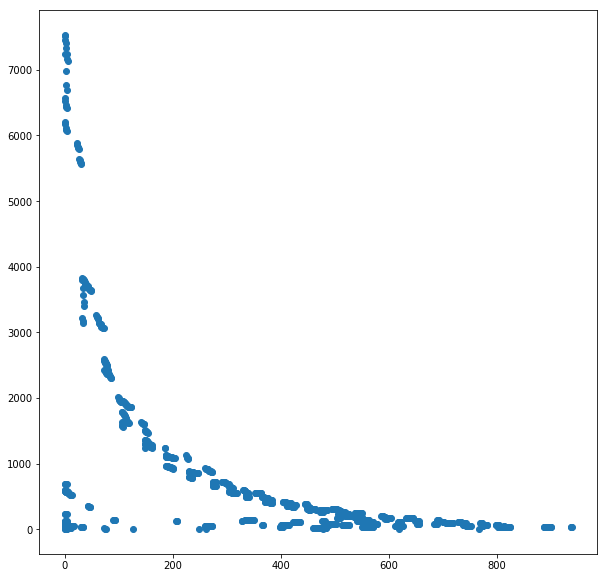

In [190]:
import scipy.stats
# df = pandas.read_csv("./real_data/Worksheet_1041_ao.csv")
# print(len(df))

# print(df.columns)
sixs = list(df.user_id)
# df["activity_name"] = df["activity_name"].str.lower()
# qixs = df["activity_name"].map(str) + "~" + df["question_order"].map(str)
# outs = df["is_correct"].map(int)

# print(sixs[0:10])
# print(qixs[0:10])
# print(outs[0:10])

#what we want to plot:
#x - the average position of question
#y - the number of hits on question

xs = []
ys = []
new_qixs = []
for qix in numpy.unique(qixs):
    if "~nan" in qix:
        continue
    if qix not in qix_order_lookup:
        continue
    locs = qix_order_lookup[qix]
    aloc = scipy.stats.mode(locs)[0][0] #numpy.mean(locs)
    volm = len(locs)
#     if volm<50:
#         continue
    new_qixs.append(qix)
    xs.append(aloc)
    ys.append(volm)

indices = numpy.argsort(xs)
qixsort = numpy.array(new_qixs)[indices]
xs = numpy.array(xs)[indices]
ys = numpy.array(ys)[indices]

print("ANG")
for qix, aloc, volm in zip(qixsort, xs, ys):
    print(qix, aloc, volm)


plt.figure(figsize=(10,10))
plt.scatter(xs,ys)


In [50]:
inv_qid_lookup = {}
for qid in qid_qix_lookup:
    qix = qid_qix_lookup[qid]
    inv_qid_lookup[qix] = qid

t_shits, t_fhits = t_hits[:,0], t_hits[:,1]
tup = t_sixs, t_qixs, t_shits, t_fhits, t_out
# tup = (o_sixs, o_qixs, o_hits, o_out)
for os,oq,osh,ofh,ot in zip(*tup):
    print(os, oq, inv_qid_lookup[oq], ":", ot)
    print(list(osh))
    print(list(ofh))
    #     print(sum(och[0]))
#     print(sum(och[1]))
#     print(sum(och))
#     for ochlet in och:
#         print(list(ochlet))
#     print(list(och)[0:10])
#     print(och[0] + och[1])
    print("____")

0 30 Minimal pairs 1~15.0 : 0
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
____
1 15 Dialogue 1~5.0 : 1
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
____
2 32 Topic associations 1~2.0 : 0
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
____
3 57 Phrasal Verbs 1~14.0 : 0
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row form

[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
____
352 205 Dialogue 6~5.0 : 1
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
____
354 376 Topic match 10~3.0 : 0
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
____
356 380 Topic match 10~7.0 : 1
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
____
359 74 Spelling 3~1

	with 1 stored elements in Compressed Sparse Row format>]
____
691 106 Phrasal verbs 5~9.0 : 0
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
____
694 3 Speed reading 14~5.0 : 1
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
____
695 359 Dialogue 3~5.0 : 0
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
____
699 387 Error finding 6~7.0 : 0
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class '

	with 1 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
____
1091 77 Speed reading 13~2.0 : 1
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
____
1095 318 Dialogue 11~5.0 : 1
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
____
1097 15 Dialogue 1~5.0 : 1
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
____
1098 10 Error finding 1~7.0 : 0
[<1x1 sparse matrix of type '<class 'n

[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
____
1414 220 Minimal pairs 6~15.0 : 0
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
____
1415 5 Error finding 1~2.0 : 1
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
____
1416 80 Speed reading 13~5.0 : 0
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
____
1419 3 Spe

1871 8 Error finding 1~5.0 : 1
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
____
1872 373 Phrasal verbs 3~14.0 : 1
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
____
1873 232 Topic match 4~7.0 : 1
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
____
1876 97 Minimal pairs 3~15.0 : 1
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Spar

2141 6 Error finding 1~3.0 : 0
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
____
2143 80 Speed reading 13~5.0 : 0
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
____
2145 129 Spelling 4~18.0 : 1
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
____
2146 3 Speed reading 14~5.0 : 1
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse R

2452 395 Topic match 1~7.0 : 1
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
____
2453 182 Speed reading 4~4.0 : 0
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
____
2457 30 Minimal pairs 1~15.0 : 1
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
____
2460 380 Topic match 10~7.0 : 1
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Spar

[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
____
2784 30 Minimal pairs 1~15.0 : 1
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
____
2785 200 Spelling 6~18.0 : 1
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
____
2789 441 Topic match 5~7.0 : 1
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
____
2792 80 Speed reading 13~5.0 : 1
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sp

3125 77 Speed reading 13~2.0 : 0
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
____
3127 51 Phrasal Verbs 1~8.0 : 0
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
____
3130 263 Spelling 5~18.0 : 1
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
____
3131 97 Minimal pairs 3~15.0 : 1
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse

3521 15 Dialogue 1~5.0 : 1
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
____
3522 30 Minimal pairs 1~15.0 : 0
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
____
3526 471 Minimal pairs 7~15.0 : 1
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
____
3527 476 Speed reading 5~2.0 : 0
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse

[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
____
3808 82 Topic associations 1~3.0 : 1
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
____
3810 373 Phrasal verbs 3~14.0 : 0
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
____
3811 15 Dialogue 1~5.0 : 1
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
____
3813 87 Mi

4240 380 Topic match 10~7.0 : 1
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
____
4241 387 Error finding 6~7.0 : 0
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
____
4244 15 Dialogue 1~5.0 : 1
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
____
4245 246 Phrasal verbs 4~14.0 : 0
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse 

4522 30 Minimal pairs 1~15.0 : 1
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
____
4525 15 Dialogue 1~5.0 : 1
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
____
4528 11 Dialogue 1~1.0 : 1
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
____
4529 674 Topic match 1~1.0 : 0
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row form

4840 128 Spelling 4~17.0 : 0
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
____
4841 3 Speed reading 14~5.0 : 1
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
____
4843 3 Speed reading 14~5.0 : 1
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
____
4845 7 Error finding 1~4.0 : 0
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Ro

[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
____
5188 1013 Topic associations 5~2.0 : 0
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
____
5191 160 Phrasal verbs 7~14.0 : 0
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
____
5194 77 Speed reading 13~2.0 : 1
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
____
5195 15 Dialogue 1~5.0 : 1
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compre

[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
____
5566 1 Speed reading 14~3.0 : 0
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
____
5570 3 Speed reading 14~5.0 : 0
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
____
5571 10 Error finding 1~7.0 : 0
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
____
5572 175 Min

	with 1 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
____
5896 97 Minimal pairs 3~15.0 : 1
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
____
5897 395 Topic match 1~7.0 : 1
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
____
5899 97 Minimal pairs 3~15.0 : 1
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
____
5900 3 Speed reading 14~5.0 : 0
[<1x1 sparse matrix of type '<

[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
____
6244 10 Error finding 1~7.0 : 1
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
____
6245 480 Topic match 8~2.0 : 0
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
____
6246 3 Speed reading 14~5.0 : 1
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
____
6251 366 Phra

6619 10 Error finding 1~7.0 : 1
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
____
6622 313 Dialogue 10~5.0 : 0
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
____
6625 15 Dialogue 1~5.0 : 1
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
____
6626 387 Error finding 6~7.0 : 1
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row f

6995 371 Phrasal verbs 3~12.0 : 0
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
____
6998 146 Error finding 5~7.0 : 1
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
____
6999 97 Minimal pairs 3~15.0 : 1
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
____
7001 3 Speed reading 14~5.0 : 1
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed S

[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
____
7374 80 Speed reading 13~5.0 : 1
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
____
7377 129 Spelling 4~18.0 : 1
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
____
7378 233 Phrasal verbs 4~1.0 : 1
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
____
7382 13 Dialogue 1~3.0 : 1
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse

7751 80 Speed reading 13~5.0 : 1
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
____
7754 1036 Topic match 7~1.0 : 0
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
____
7758 5 Error finding 1~2.0 : 0
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
____
7759 3 Speed reading 14~5.0 : 1
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Spars

[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
____
8106 10 Error finding 1~7.0 : 1
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
____
8108 75 Topic associations 1~1.0 : 0
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
____
8111 30 Minimal pairs 1~15.0 : 1
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
____
8114 30 Minimal pairs 1~15.0 : 1
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Comp

[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
____
8512 1081 Dialogue 15~5.0 : 0
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
____
8514 80 Speed reading 13~5.0 : 0
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
____
8517 49 Phrasal Verbs 1~6.0 : 0
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
____
8520 232 Topic match 4~7.0 : 1
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sp

[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
____
8833 380 Topic match 10~7.0 : 1
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
____
8835 15 Dialogue 1~5.0 : 1
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
____
8836 97 Minimal pairs 3~15.0 : 1
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
____
8837 896 Phrasal verbs 15~14.0 : 0
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed S

9233 15 Dialogue 1~5.0 : 1
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
____
9234 106 Phrasal verbs 5~9.0 : 0
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
____
9238 373 Phrasal verbs 3~14.0 : 1
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
____
9239 30 Minimal pairs 1~15.0 : 1
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse

9581 246 Phrasal verbs 4~14.0 : 0
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
____
9584 13 Dialogue 1~3.0 : 0
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
____
9585 1011 Speed reading 2~5.0 : 1
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
____
9588 1 Speed reading 14~3.0 : 0
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse

9986 359 Dialogue 3~5.0 : 1
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
____
9987 373 Phrasal verbs 3~14.0 : 0
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
____
9988 3 Speed reading 14~5.0 : 1
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
____
9991 97 Minimal pairs 3~15.0 : 1
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse

[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
____
10332 15 Dialogue 1~5.0 : 1
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
____
10334 3 Speed reading 14~5.0 : 0
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
____
10337 10 Error finding 1~7.0 : 1
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
____
10338 74 Spelling 3~18.0 : 1
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Spars

10696 15 Dialogue 1~5.0 : 1
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
____
10699 30 Minimal pairs 1~15.0 : 1
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
____
10700 380 Topic match 10~7.0 : 1
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>]
____
10704 161 Minimal pairs 5~1.0 : 1
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Sparse Row format>]
[<1x1 sparse matrix of type '<class 'numpy.int8'>'
	with 1 stored elements in Compressed Spar

In [340]:
for el in t_hits:
    for el2 in el:
        print(sum(el2))
    print("__")

0
1
__
1
0
__
1
0
__
1
0
__
1
0
__
1
0
__
1
0
__
1
0
__
1
0
__
0
1
__
1
0
__
0
1
__
0
1
__
1
0
__
0
1
__
1
0
__
0
1
__
0
1
__
0
1
__
1
0
__
1
0
__
1
0
__
1
0
__
1
0
__
1
0
__
1
0
__
1
0
__
1
0
__
1
0
__
1
0
__
1
0
__
1
0
__
1
0
__
1
0
__
0
1
__
1
0
__
0
1
__
1
0
__
1
0
__
0
1
__
1
0
__
0
1
__
1
0
__
1
0
__
1
0
__
0
1
__
1
0
__
1
0
__
0
1
__
0
1
__
1
0
__
0
1
__
0
1
__
0
1
__
1
0
__
1
0
__
1
0
__
0
1
__
0
1
__
0
1
__
1
0
__
0
1
__
1
0
__
0
1
__
1
0
__
0
1
__
0
1
__
0
1
__
0
1
__
1
0
__
0
1
__
1
0
__
0
1
__
1
0
__
1
0
__
1
0
__
0
1
__
1
0
__
0
1
__
1
0
__
1
0
__
1
0
__
0
1
__
0
1
__
1
0
__
0
1
__
1
0
__
1
0
__
1
0
__
1
0
__
1
0
__
0
1
__
0
1
__
1
0
__
0
1
__
1
0
__
0
1
__
0
1
__
1
0
__
1
0
__
1
0
__
0
1
__
1
0
__
1
0
__
1
0
__
1
0
__
0
1
__
0
1
__
1
0
__
1
0
__
1
0
__
1
0
__
1
0
__
1
0
__
1
0
__
1
0
__
1
0
__
0
1
__
1
0
__
1
0
__
0
1
__
1
0
__
1
0
__
1
0
__
1
0
__
1
0
__
1
0
__
0
1
__
1
0
__
1
0
__
1
0
__
1
0
__
1
0
__
1
0
__
1
0
__
0
1
__
0
1
__
1
0
__
0
1
__
0
1
__
0
1
__
0
1
__
1
0
__

./pfa_models/examliftb1250000


In [ ]:
# # EXPERIMENTAL AUTOENCODER FOR HEU
# def generate_heu_autoencoder(n_questions, row_w):
#     print("ROW W is ", row_w)
#     # def generate_qs_model(qn_table, psi_table, optimiser, _mode="MXFN", loss="MSE"):  
#     from keras.initializers import RandomNormal, RandomUniform, Constant
# #     from keras.layers import LSTM
    
#     hit = Input(shape=(n_questions, ), name="hit_counter", dtype="float32")
#     h = hit

#     h = Dense(row_w, name="internal_repr")(h)

#     out = Dense(n_questions)(h)


#     # p_LFA = σ(a_s + Σ k ∊ skills(q): 𝜸_k*n_sk - d_k)

#     model = Model(inputs=[hit], outputs=out)
#     model.compile(optimizer="adam", loss="mse", metrics=["mae"])
#     print(model.summary())

#     return model

In [ ]:
# from keras.callbacks import EarlyStopping
# n_questions = o_hits.shape[1]
# heu = generate_heu_autoencoder(n_questions, 8)
# es = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
# heu.fit(o_hits, o_hits, callbacks=[es], validation_split=0.05, epochs=10000, batch_size=len(o_sixs), shuffle=True)

In [157]:
agg = defaultdict(list)
model_lookup = defaultdict(list)
max_acc = 0
handles = []

In [ ]:
f1_kde={}
acc_kde={}
upto=10
for h in handles:
    pears = numpy.array(agg[h])
    f1s = [p[0] for p in pears]
    mu_f1 = numpy.mean(f1s)
    accs = [p[1] for p in pears]
    mu_acc = numpy.mean(accs)
    print(h, len(pears))
    print(pears)
#     print(av_f1, av_acc)
    print("\t", numpy.round(mu_f1,4), numpy.round(mu_acc,4))
    f1_kde[h] = f1s[0:upto]
    acc_kde[h] = accs[0:upto]

print("Plot of resultant F1 score")
# print(f1_kde)
for row in f1_kde:
    print(row)
ax1 = pandas.DataFrame(f1_kde).plot.kde(bw_method=.8, figsize=(8,8))
ax1.set_xlabel("$F_{1}$")
ax1.set_title("Distribution of prediction $F_{1}$ across models")

print("Plot of resultant F1 score")
print(acc_kde)
ax2 = pandas.DataFrame(acc_kde).plot.kde(bw_method=.8, figsize=(8,8))
ax2.set_xlabel("Accuracy")
ax2.set_title("Distribution of prediction accuracy across models")

plt.show()

In [ ]:
for h in handles:
    print(h)

In [ ]:
#rankin.append( (avg_f1, std_f1, avg_acc, std_acc, avg_mae, std_mae, handle) ) 
xs, ys, ups, los = [],[],[],[]
handle_filter = "AFMS"
for tup in rankin:
    handle = tup[-1]
    if not handle.startswith(handle_filter):
        continue
    if "bal" not in handle:
        continue
    print(handle)
    w = int(handle.split("/")[0][len(handle_filter):])
    y = tup[0]
    s = tup[1]
    xs.append(w)
    ys.append(y)
    ups.append(y+s)
    los.append(y-s)
xs,ys,ups,los = zip(*sorted(zip(xs, ys, ups, los)))

plt.plot(xs,ys)
plt.plot(xs,ups, linestyle="--")
plt.plot(xs,los, linestyle="--")
plt.title("ExamLift(B1) - Effect of embedding width on prediction ({})".format(handle_filter))
plt.xlabel("Embedding width")
plt.ylabel("$F_{1}$ score")
plt.show()

MLP:w32/qNone/val_f1_m/bal & 0.722 (0.01066) & 0.736 (0.01128) & 0.264 (0.01128) \\
MLP:w32/qNone/val_f1_m & 0.711 (0.00962) & 0.727 (0.00913) & 0.273 (0.00913) \\

MLP:w32/qNone/val_mean_absolute_error & 0.705 (0.00485) & 0.721 (0.00382) & 0.279 (0.00382) \\
MLP:w32/qNone/val_mean_absolute_error/bal & 0.703 (0.00599) & 0.717 (0.00525) & 0.283 (0.00525) \\
MLP:w32/qNone/val_f1_m/bal

In [ ]:
do_plot=True

plt.figure(figsize=(8,8))

for item in history_results:
    #     best_x = range(len(v_acc))[-11]
    #     plt.ylim(0,1)
    if do_plot:
        plt.plot(plot_acc, label="{} (val acc) {}".format(cog_model, emb_w))
        plt.annotate("{} (val acc) {}".format(cog_model, emb_w), (len(plot_acc), plot_acc[-1]))
    #     plt.axvline(x=best_x, ymax=max(v_acc), linestyle="--")
    #     plt.plot(plot_acc, label="{} (trn loss)".format(min_h))
    #     plt.plot(plot_loss, linestyle="--", label="{} (val loss)".format(min_h))
    #     plt.plot(plot_mse, linestyle="-", label="{}".format(cog_model))
    #     plt.plot(plot_loss, linestyle="--", label="{} (loss)".format(cog_model))
    #     plt.legend(title="Cognitive Model")
    #     plt.ylabel("Validation Mean Absolute Error (Val MAE)")
        plt.ylabel("Validation Accuracy")
        plt.xlabel("Number of epochs")
        plt.title("Training of different cognitive models (Exam Lift (B1))")

#     print("**", max_mod, max_acc, min_loss, min_mse)
#     m = best_m
plt.legend()
plt.show()